# Portuguese Wine Quality Dataset 

This notebook processes a dataset of red and white wine physicochemical qualities and classifies wines based on their quality. The quality data is based on previous quality data obtained by sensory testing.(see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/). It also processes the two wine types separately, also calculates training and inference time based on different algorithms, features and dataset size.

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC

## Previewing the Wine Dataset

In [2]:
df1 = pd.read_csv('winequality-red.csv', sep = ';')
df2 = pd.read_csv('winequality-white.csv',sep = ';')

# Add new column to distinguish wine types after combining
df1['wine_type'] = 'red' 
df2['wine_type'] = 'white'
df1['wine_type'] = df1['wine_type'].map({'red': 0, 'white': 1})
df2['wine_type'] = df2['wine_type'].map({'red': 0, 'white': 1})

#Join both datasets
df = pd.concat([df1,df2])

df.head() # Preview 1st 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [3]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(6497, 13)
(1599, 13)
(4898, 13)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [5]:
df.isna().sum() # Checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [6]:
df.describe().round(2) # Summary statistics table 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00,1.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.00


<Axes: >

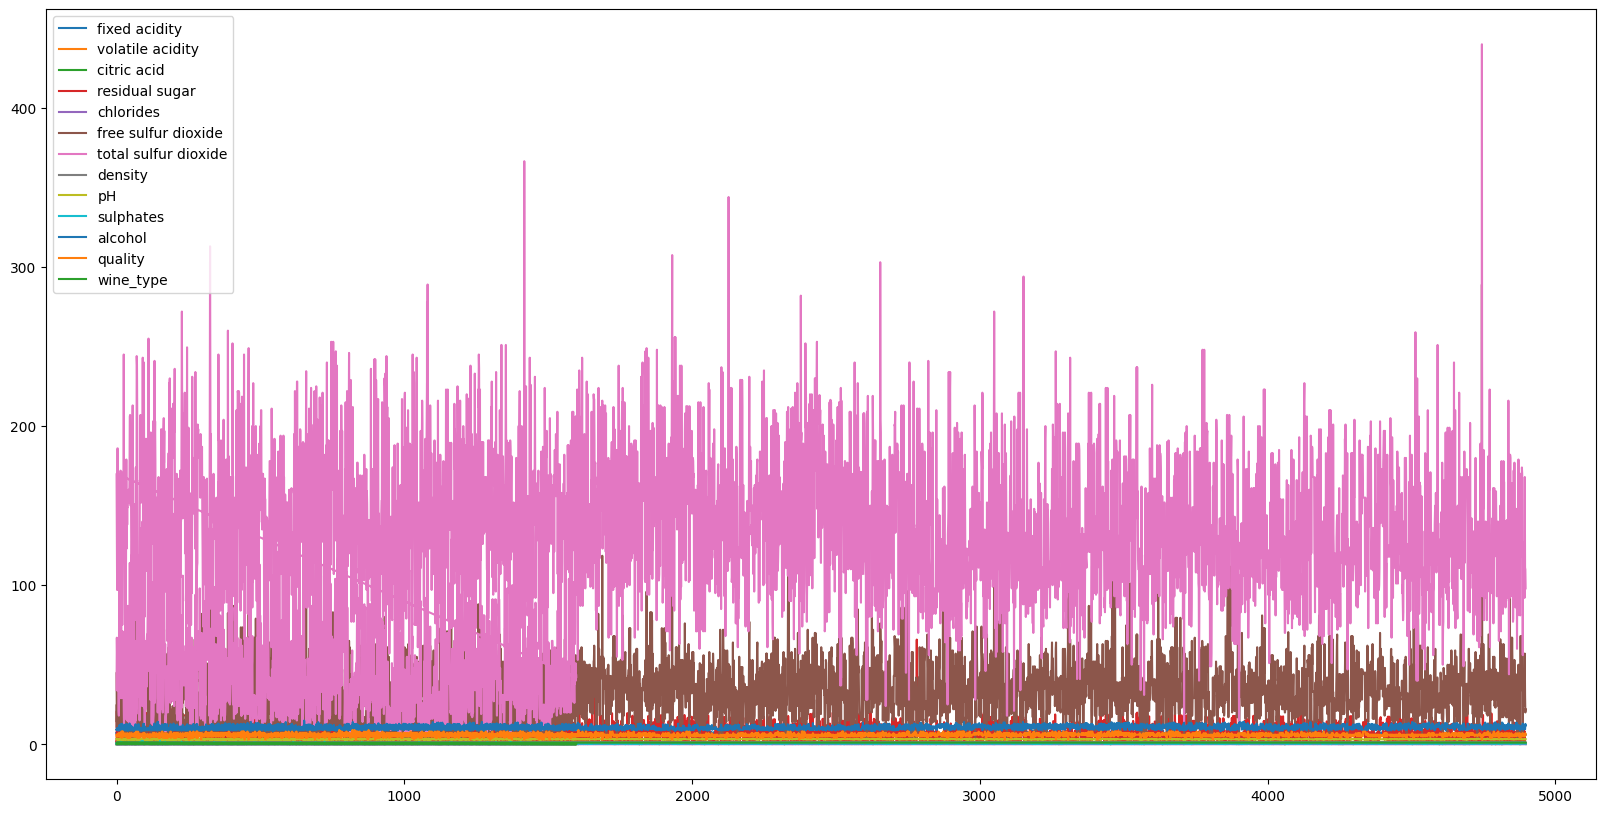

In [7]:
df.plot(figsize = (20,10)) # Plot Dataset

<Axes: xlabel='wine_type'>

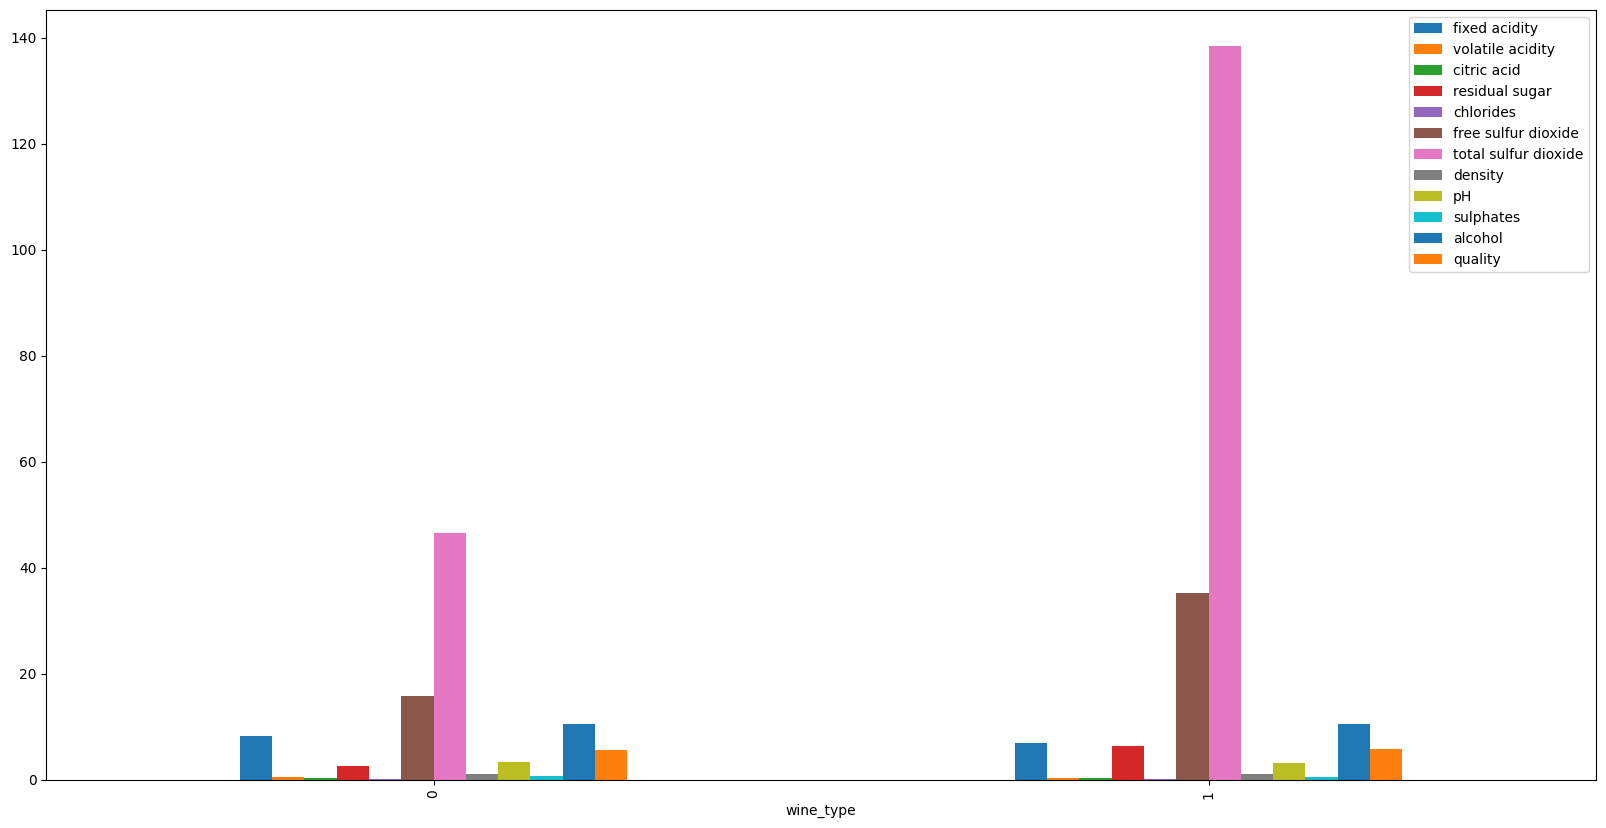

In [8]:
# Plot Grouped Data by Quality
df.groupby("wine_type").mean().plot(kind="bar",figsize=(20,10))

# 0 = Red Wine, 1 

Label: 0 = red wine, 1 = white wine
* Observing this plot, we can conclude that since the chemical properties are very different between the wine types, the two datasets **should not be processed togheter** since it can lead to lower accuracy later in the classification

<Axes: xlabel='quality'>

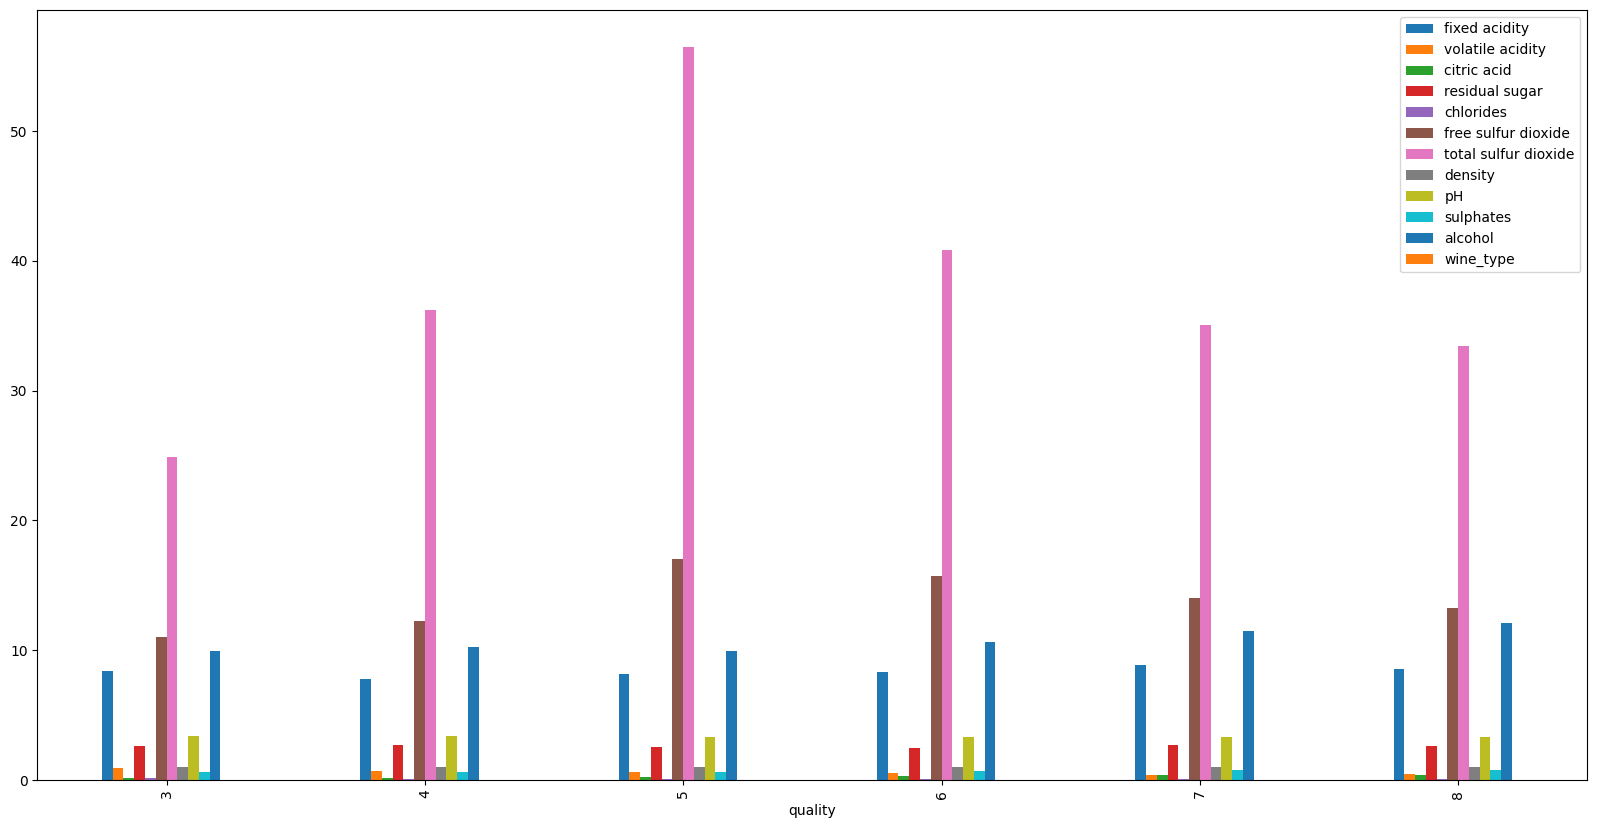

In [9]:
# Plot of Red Wine Grouped Data by Quality
df1.groupby("quality").mean().plot(kind="bar",figsize=(20,10))

<Axes: xlabel='quality'>

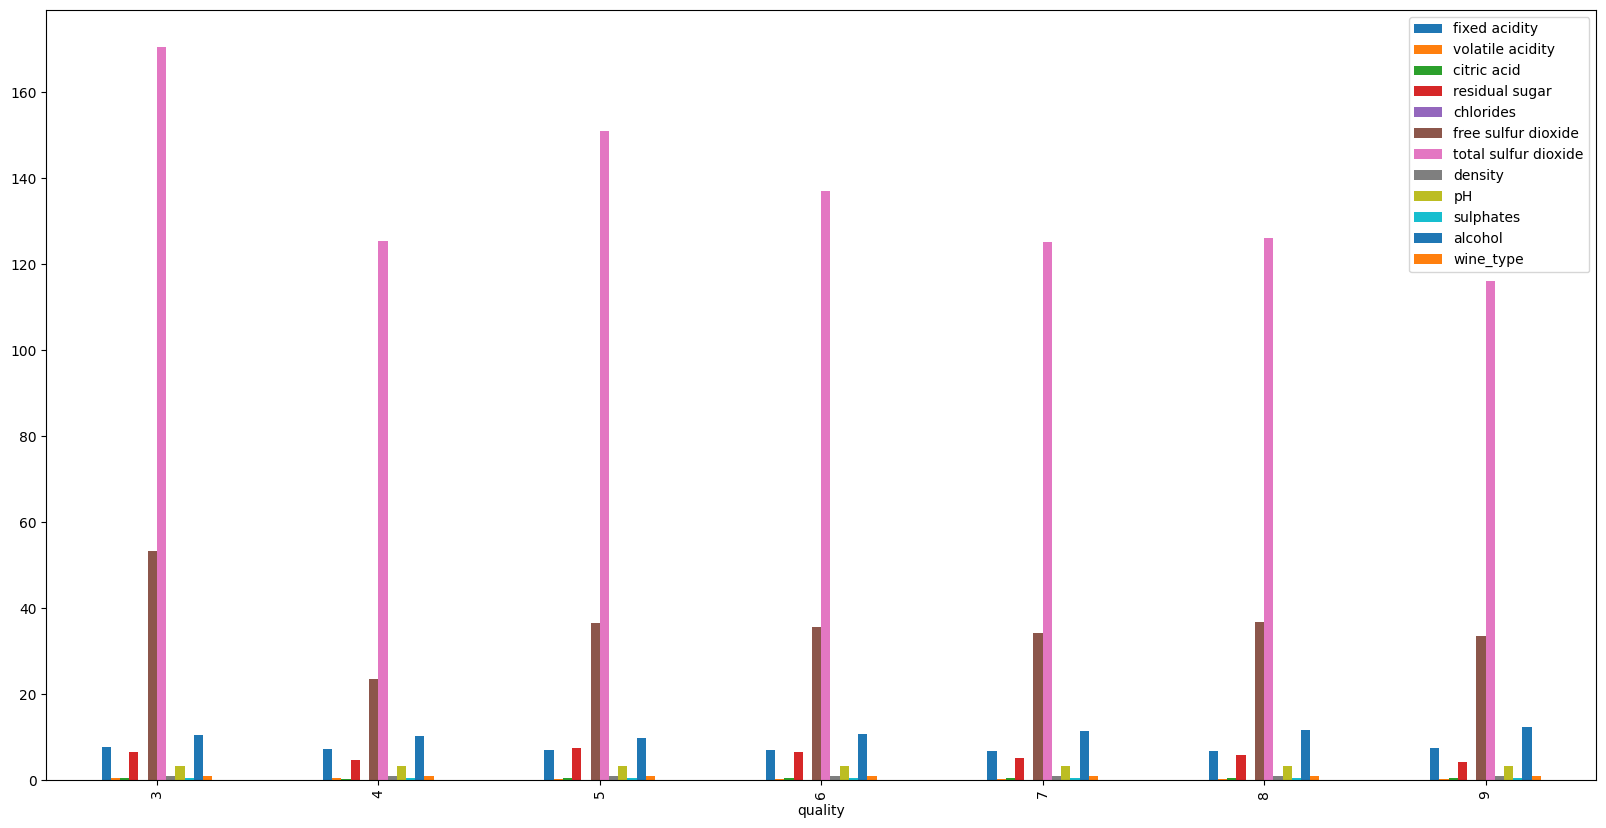

In [10]:
# Plot of White Wine Grouped Data by Quality
df2.groupby("quality").mean().plot(kind="bar",figsize=(20,10))

* Observing the distibution of the mean of wine chemicals along the different wine qualities, we can corroborate the previous conclusion, since both distributions vary a lot, again, **they should not be processed togheter**.

## Chemicals Effect on Wine Quality

### Red Wine

#### Plots of Feature Impact on Quality

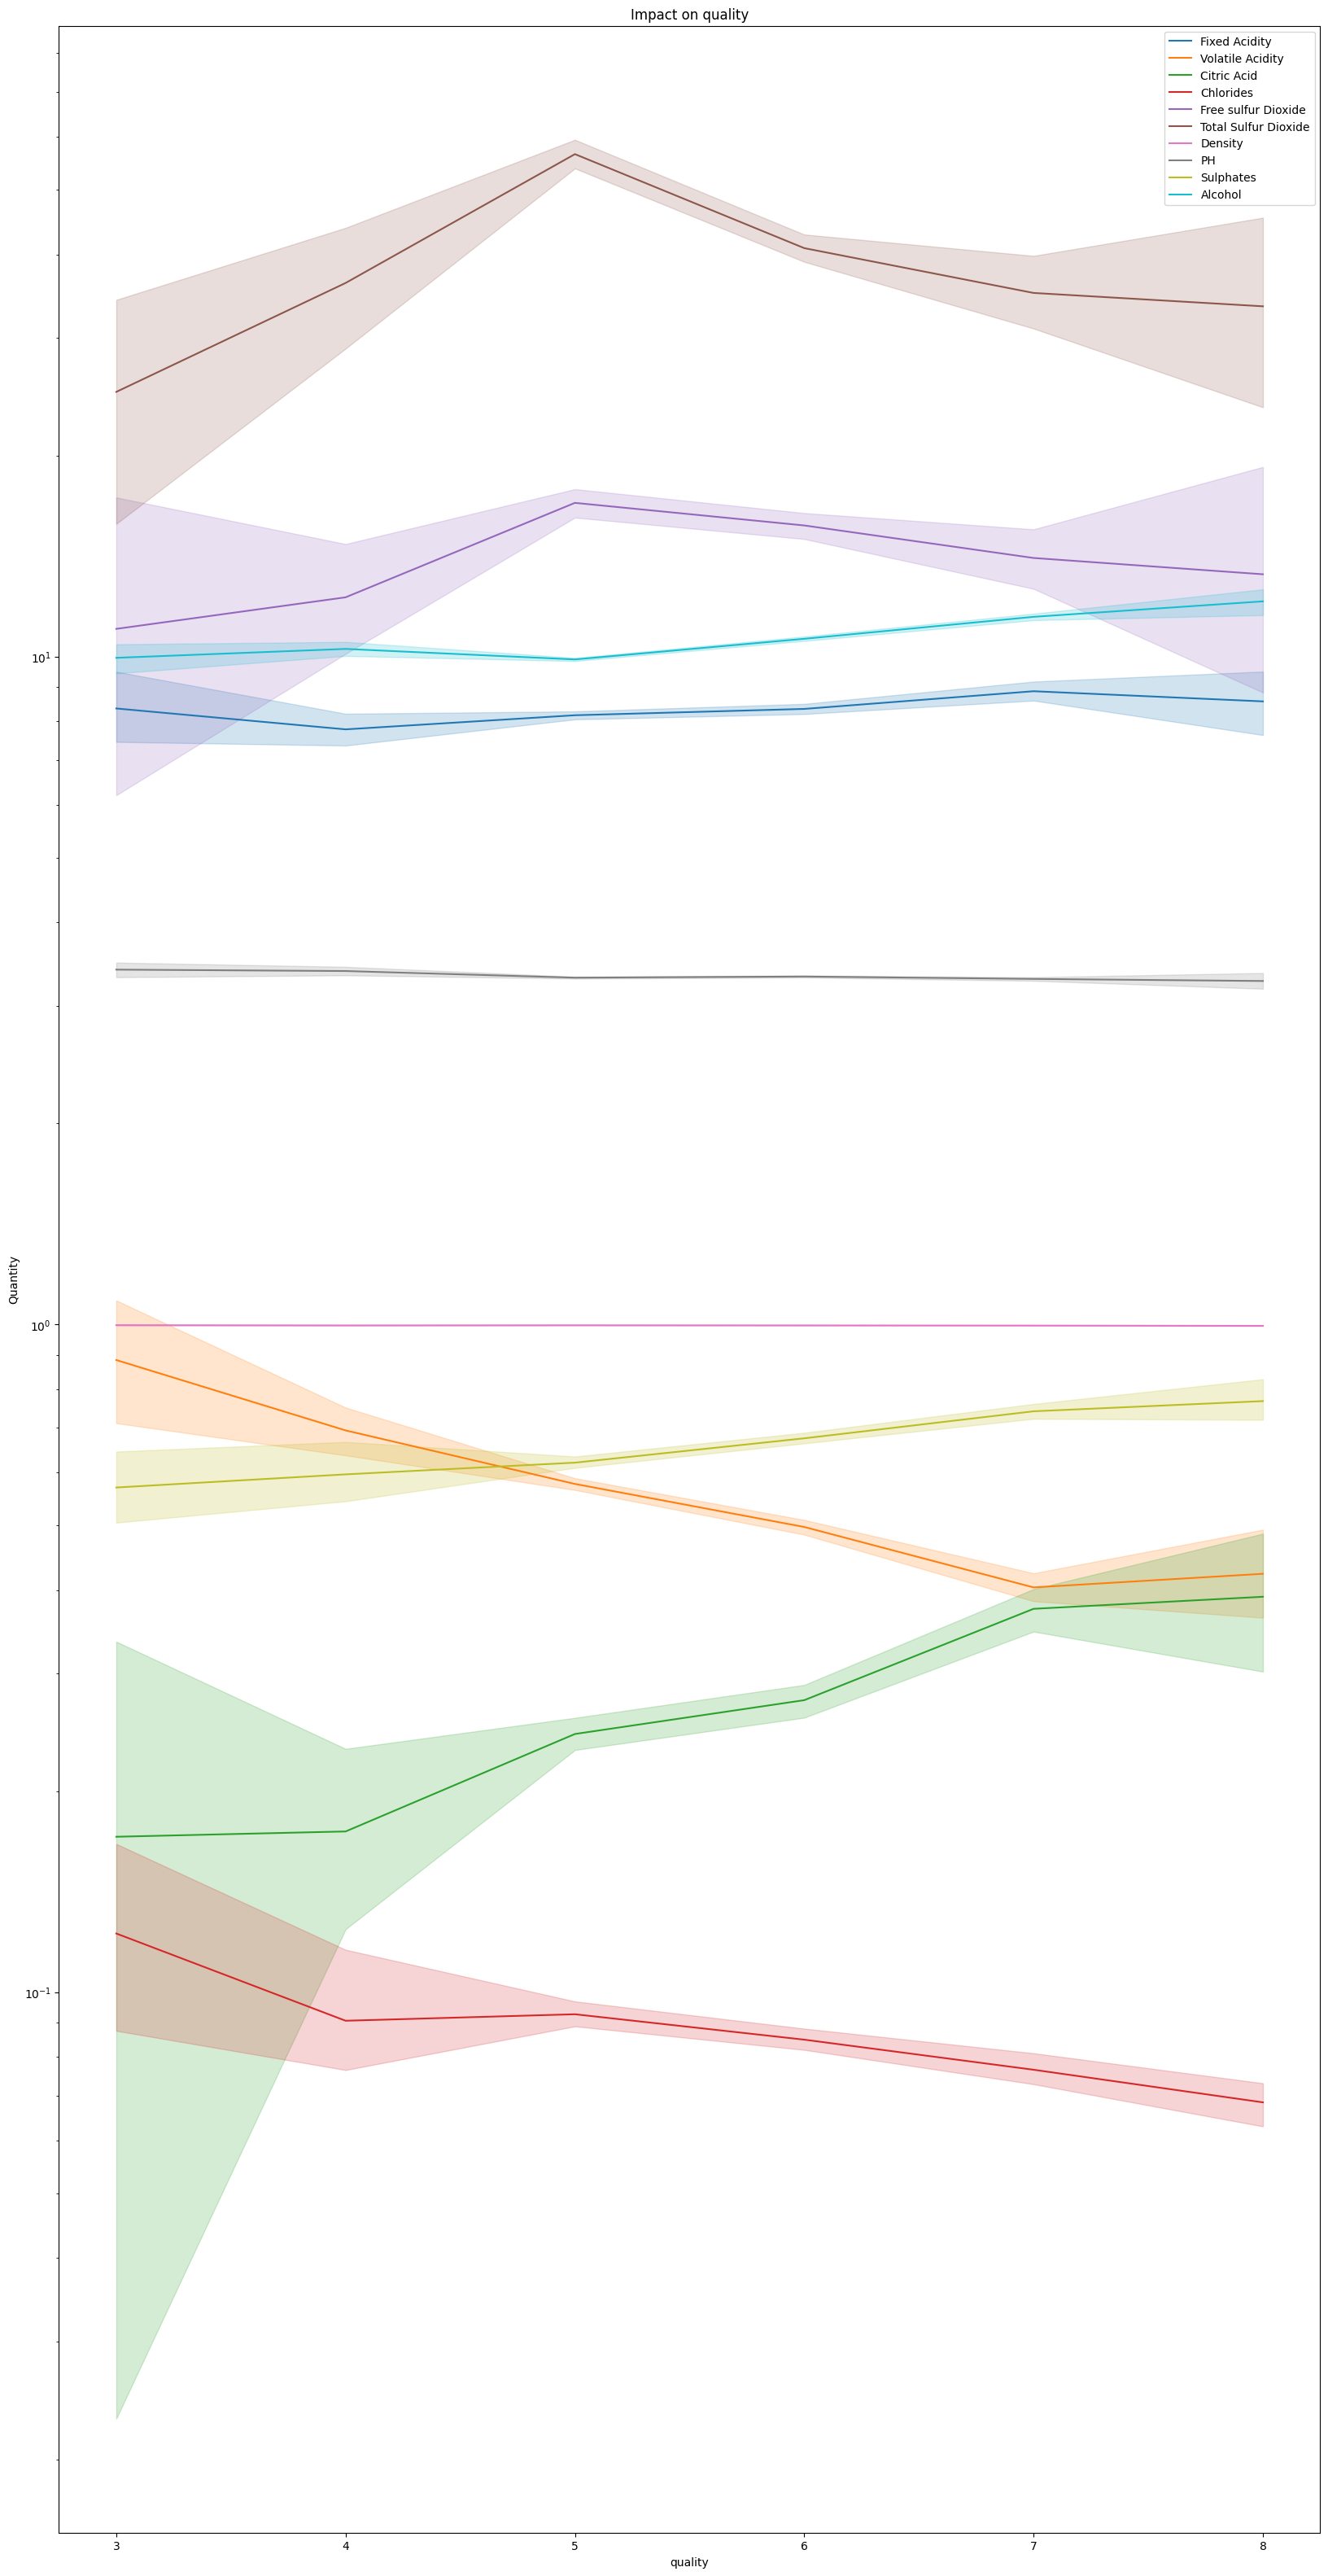

In [11]:
plt.figure(figsize=(20,40))
sns.lineplot(data=df1, x="quality",y="fixed acidity",label="Fixed Acidity")
sns.lineplot(data=df1, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df1, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df1, x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=df1, x="quality",y="free sulfur dioxide",label="Free sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="density",label="Density")
sns.lineplot(data=df1, x="quality",y="pH",label="PH")
sns.lineplot(data=df1, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=df1, x="quality",y="alcohol",label="Alcohol")
plt.yscale('log') # Applied logaritmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

* On a quick analysis we can observe that *alchool*, *sulphates*, and *citric acid* may have a positive correlation with wine quality.
* On the other hand, *volatile acidity* and *chlorides* show a negative trend as quality increases.
* The other features show less variation or show no correlation with quality.

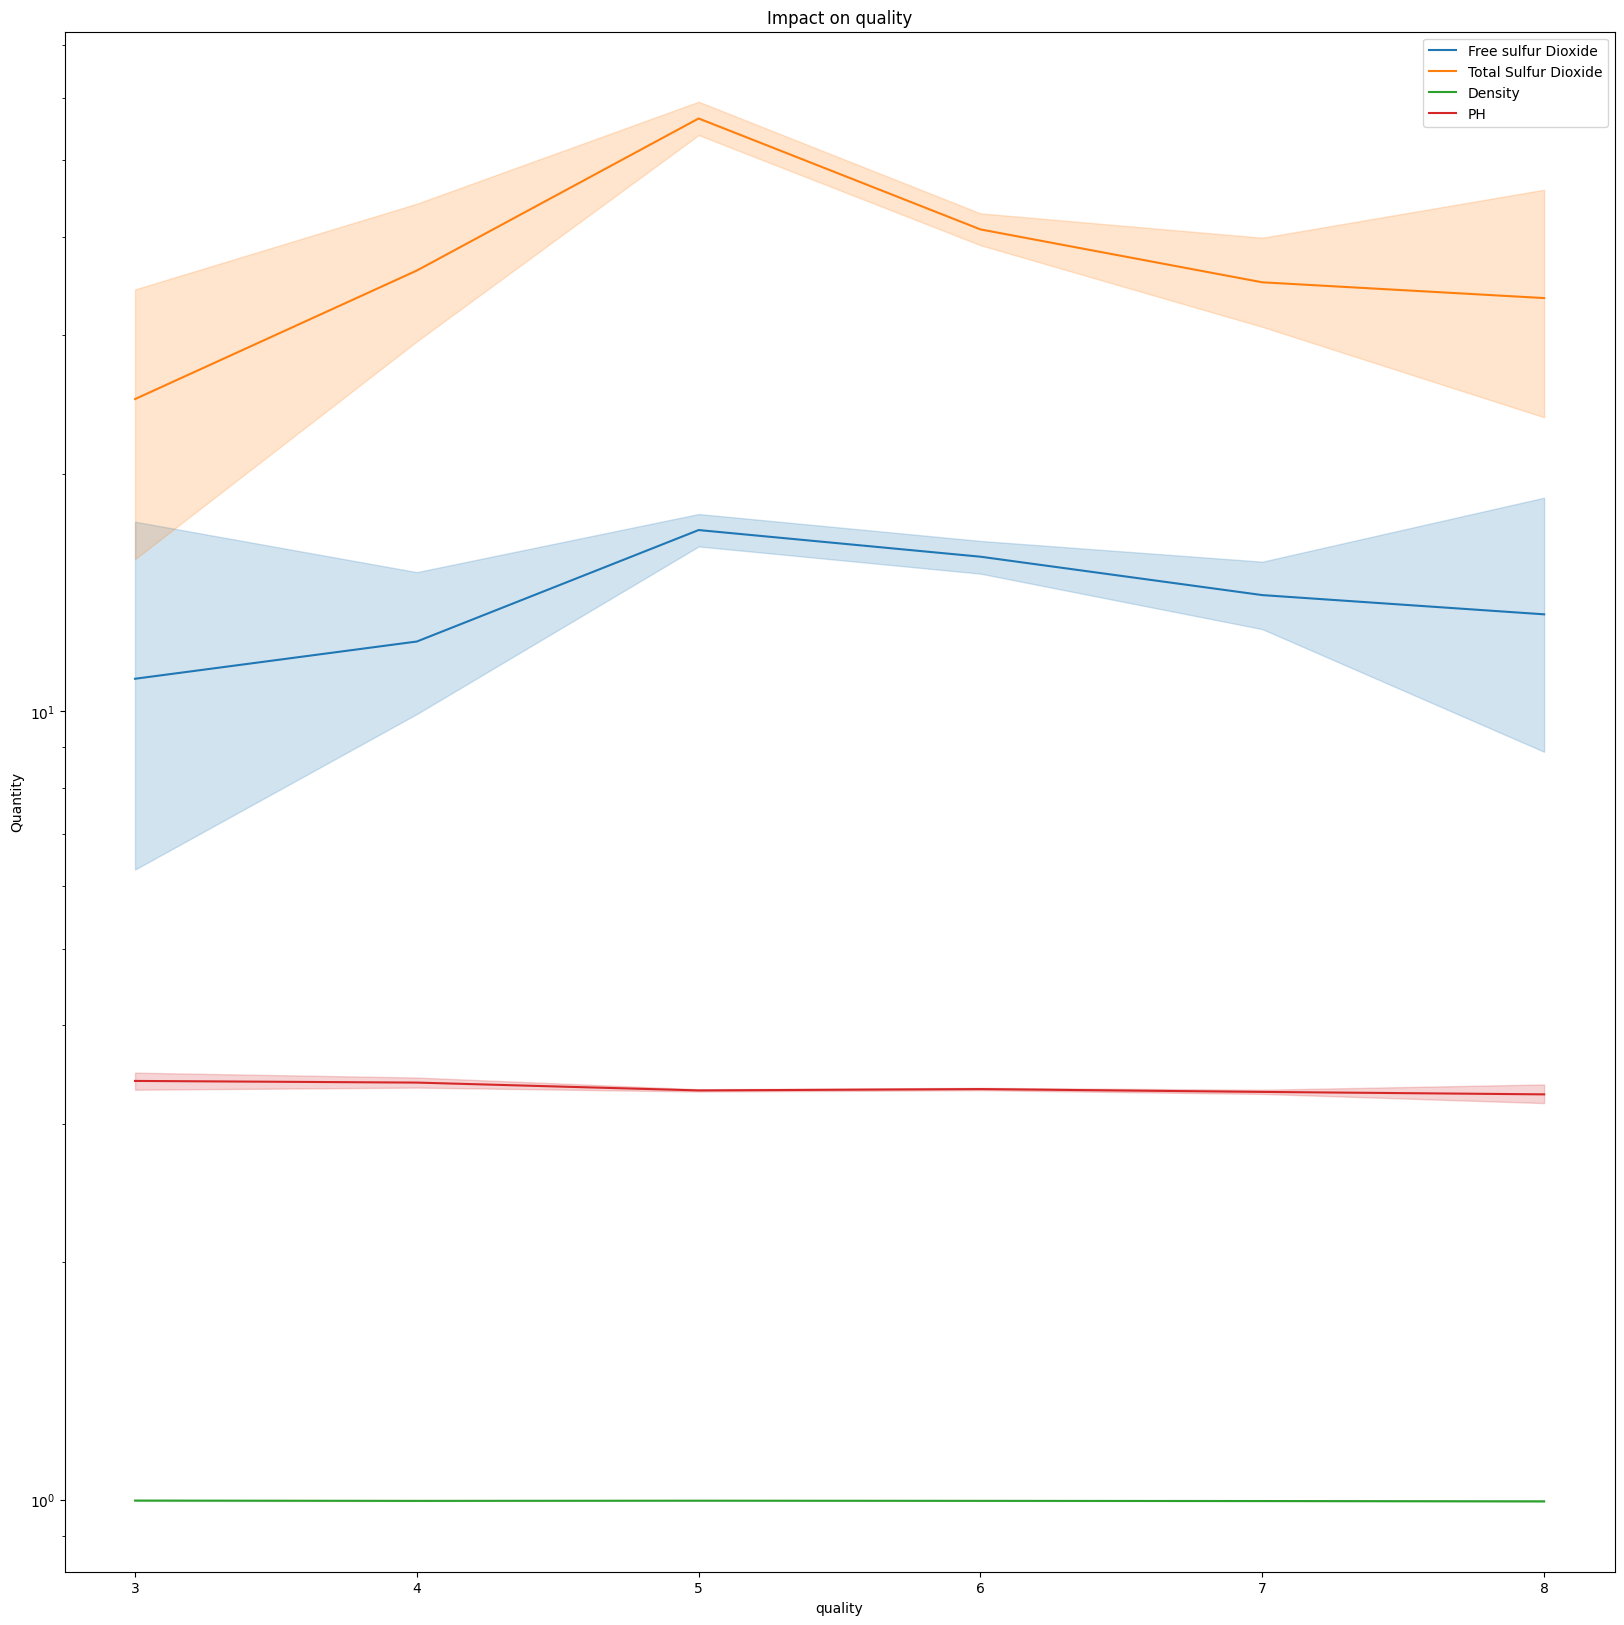

In [12]:
# Ploting only the less influential features

plt.figure(figsize=(20,20))
sns.lineplot(data=df1, x="quality",y="free sulfur dioxide",label="Free sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df1, x="quality",y="density",label="Density")
sns.lineplot(data=df1, x="quality",y="pH",label="PH")
plt.yscale('log') # Applied logaritmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

* Ploting again only the less influential features, we can conclude that *density* really low variation.
* Both *sulfur dioxide metrics* again show a low influence on quality.
* *pH* shows a very small correlation in relation to quality but declines steadly.

#### Correlation Heatmap

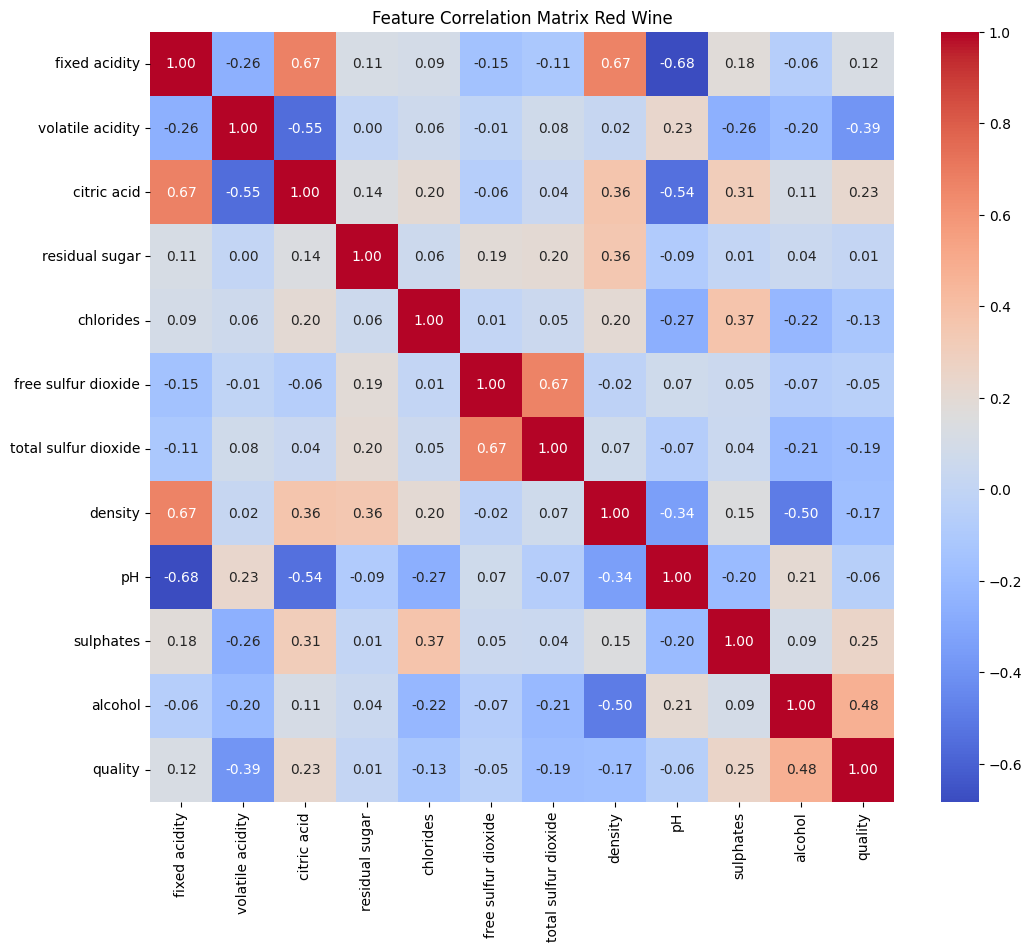

In [13]:
# Correlation Matrix to better analyse what features should be included in the dataset

corr_df1 = df1.corr().drop(index='wine_type', columns='wine_type')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df1, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix Red Wine")
plt.show()


Observing the heatmap we can observe that:

* *Alcohol* has the strongest positive correlation with *quality*: 0.48;
* *Sulphates* has a moderate positive correlation with *quality*: 0.25;
* *Citric Acid* has a weak positive correlation with *quality*: 0.23;
* *Volatile Acidity* has the strongest negative correlation with *quality*: -0.39;
* *Chlorides* has a weak negative correlation with *quality*: -0.13;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* show a weak negative correlation with *quality*: -0.05, -0.19 respectively;
---
* *Fixed Acidity <-> Citric Acid* show a strong positive correlation: 0.67;
* *Free Sulfur <-> Total Sulfur Dioxide* show a strong positive correlation: 0.67;
* *Fixed Acidity <-> Density* show a strong positive correlation: 0.67;
* *pH <-> Fixed Acidity* show a strong negative correlation: -0.68;

Analysing this data we can conclude that:

* *Alcohol* is a clear differentiator in wine quality;
* *Volatile Acidity* negative correlation with quality leads to high correlation to low quality wines;
* *Sulphates* are importante to diferentiate wine quality;
* *Citric Acid* can also contribute to diferentiate wine quality;
---
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* since they have high correlation between eachother and low correlation with *quality*, could be included only one.

#### Random Forest Feature Importance

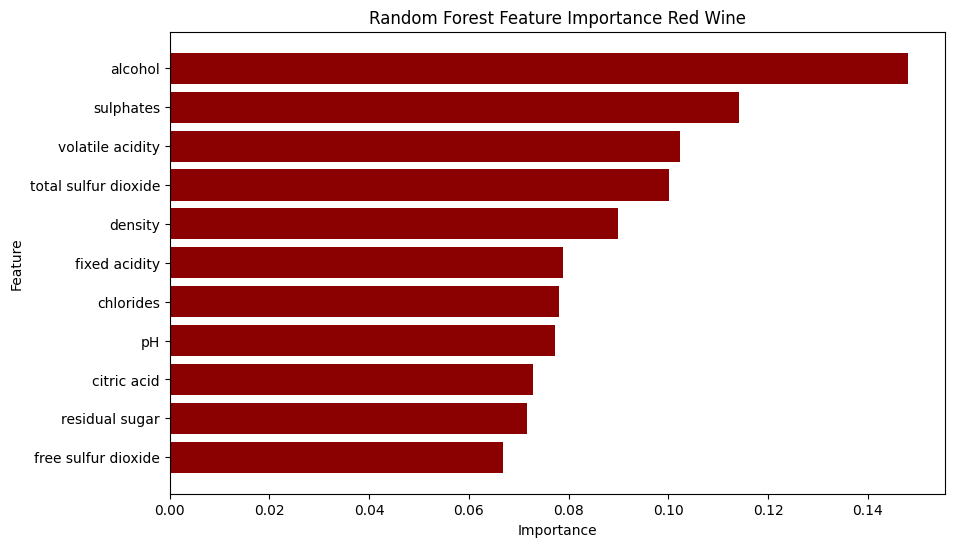

                 Feature  Importance
10               alcohol    0.147969
9              sulphates    0.114105
1       volatile acidity    0.102286
6   total sulfur dioxide    0.100200
7                density    0.089911
0          fixed acidity    0.078786
4              chlorides    0.078145
8                     pH    0.077227
2            citric acid    0.072870
3         residual sugar    0.071623
5    free sulfur dioxide    0.066878


In [14]:
def rffi_red():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Train the Random Forest Classifier
    rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train, y_train)
    
    # Get feature importance
    feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='darkred')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance Red Wine')
    plt.gca().invert_yaxis()
    plt.show()
    
    # Display feature importance
    print(feature_importances)

rffi_red()


Analyzing the feature importance from the Random Forest model, we can observe that:

* *Alcohol* is the most important feature, with a feature importance value of 0.14;
* *Sulphates* is the second most important feature, with a value of 0.11, showing significant impact;
* *Total Sulfur Dioxide* has a moderate importance, with a value of 0.10;
* *Volatile Acidity* shows a significant impact with a feature importance of 0.10;
* *Density* contributes moderately, with an importance of 0.09;
* *pH* has moderate importance as well, with a value of 0.08;
* *Chlorides* and *Fixed Acidity* show weaker importance, with values of 0.08 and 0.07 respectively;
* *Residual Sugar* and *Free Sulfur Dioxide* are among the least important features, with values of 0.07 and 0.06.

---
Analysing this data we can conclude that:

* *Alcohol* is the most important differentiator in predicting wine quality;
* *Sulphates* are a strong contributor to differentiating wine quality;
* *Volatile Acidity* plays an important role, with its negative impact on quality making it a key factor in identifying low-quality wines;
* *Total Sulfur Dioxide* has a moderate influence, suggesting its indirect effect on quality;
* *Density* and *pH* can contribute moderately to quality prediction;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide*, due to their high correlation with each other and the low contribution of *Free Sulfur Dioxide*, could justify keeping only *Total Sulfur Dioxide* in the model;
* Features like *Residual Sugar*, *Fixed Acidity*, and *Chlorides* could potentially be deprioritized for prediction, as their contribution is weaker.


### White Wine

#### Plots of Feature Impact on Quality

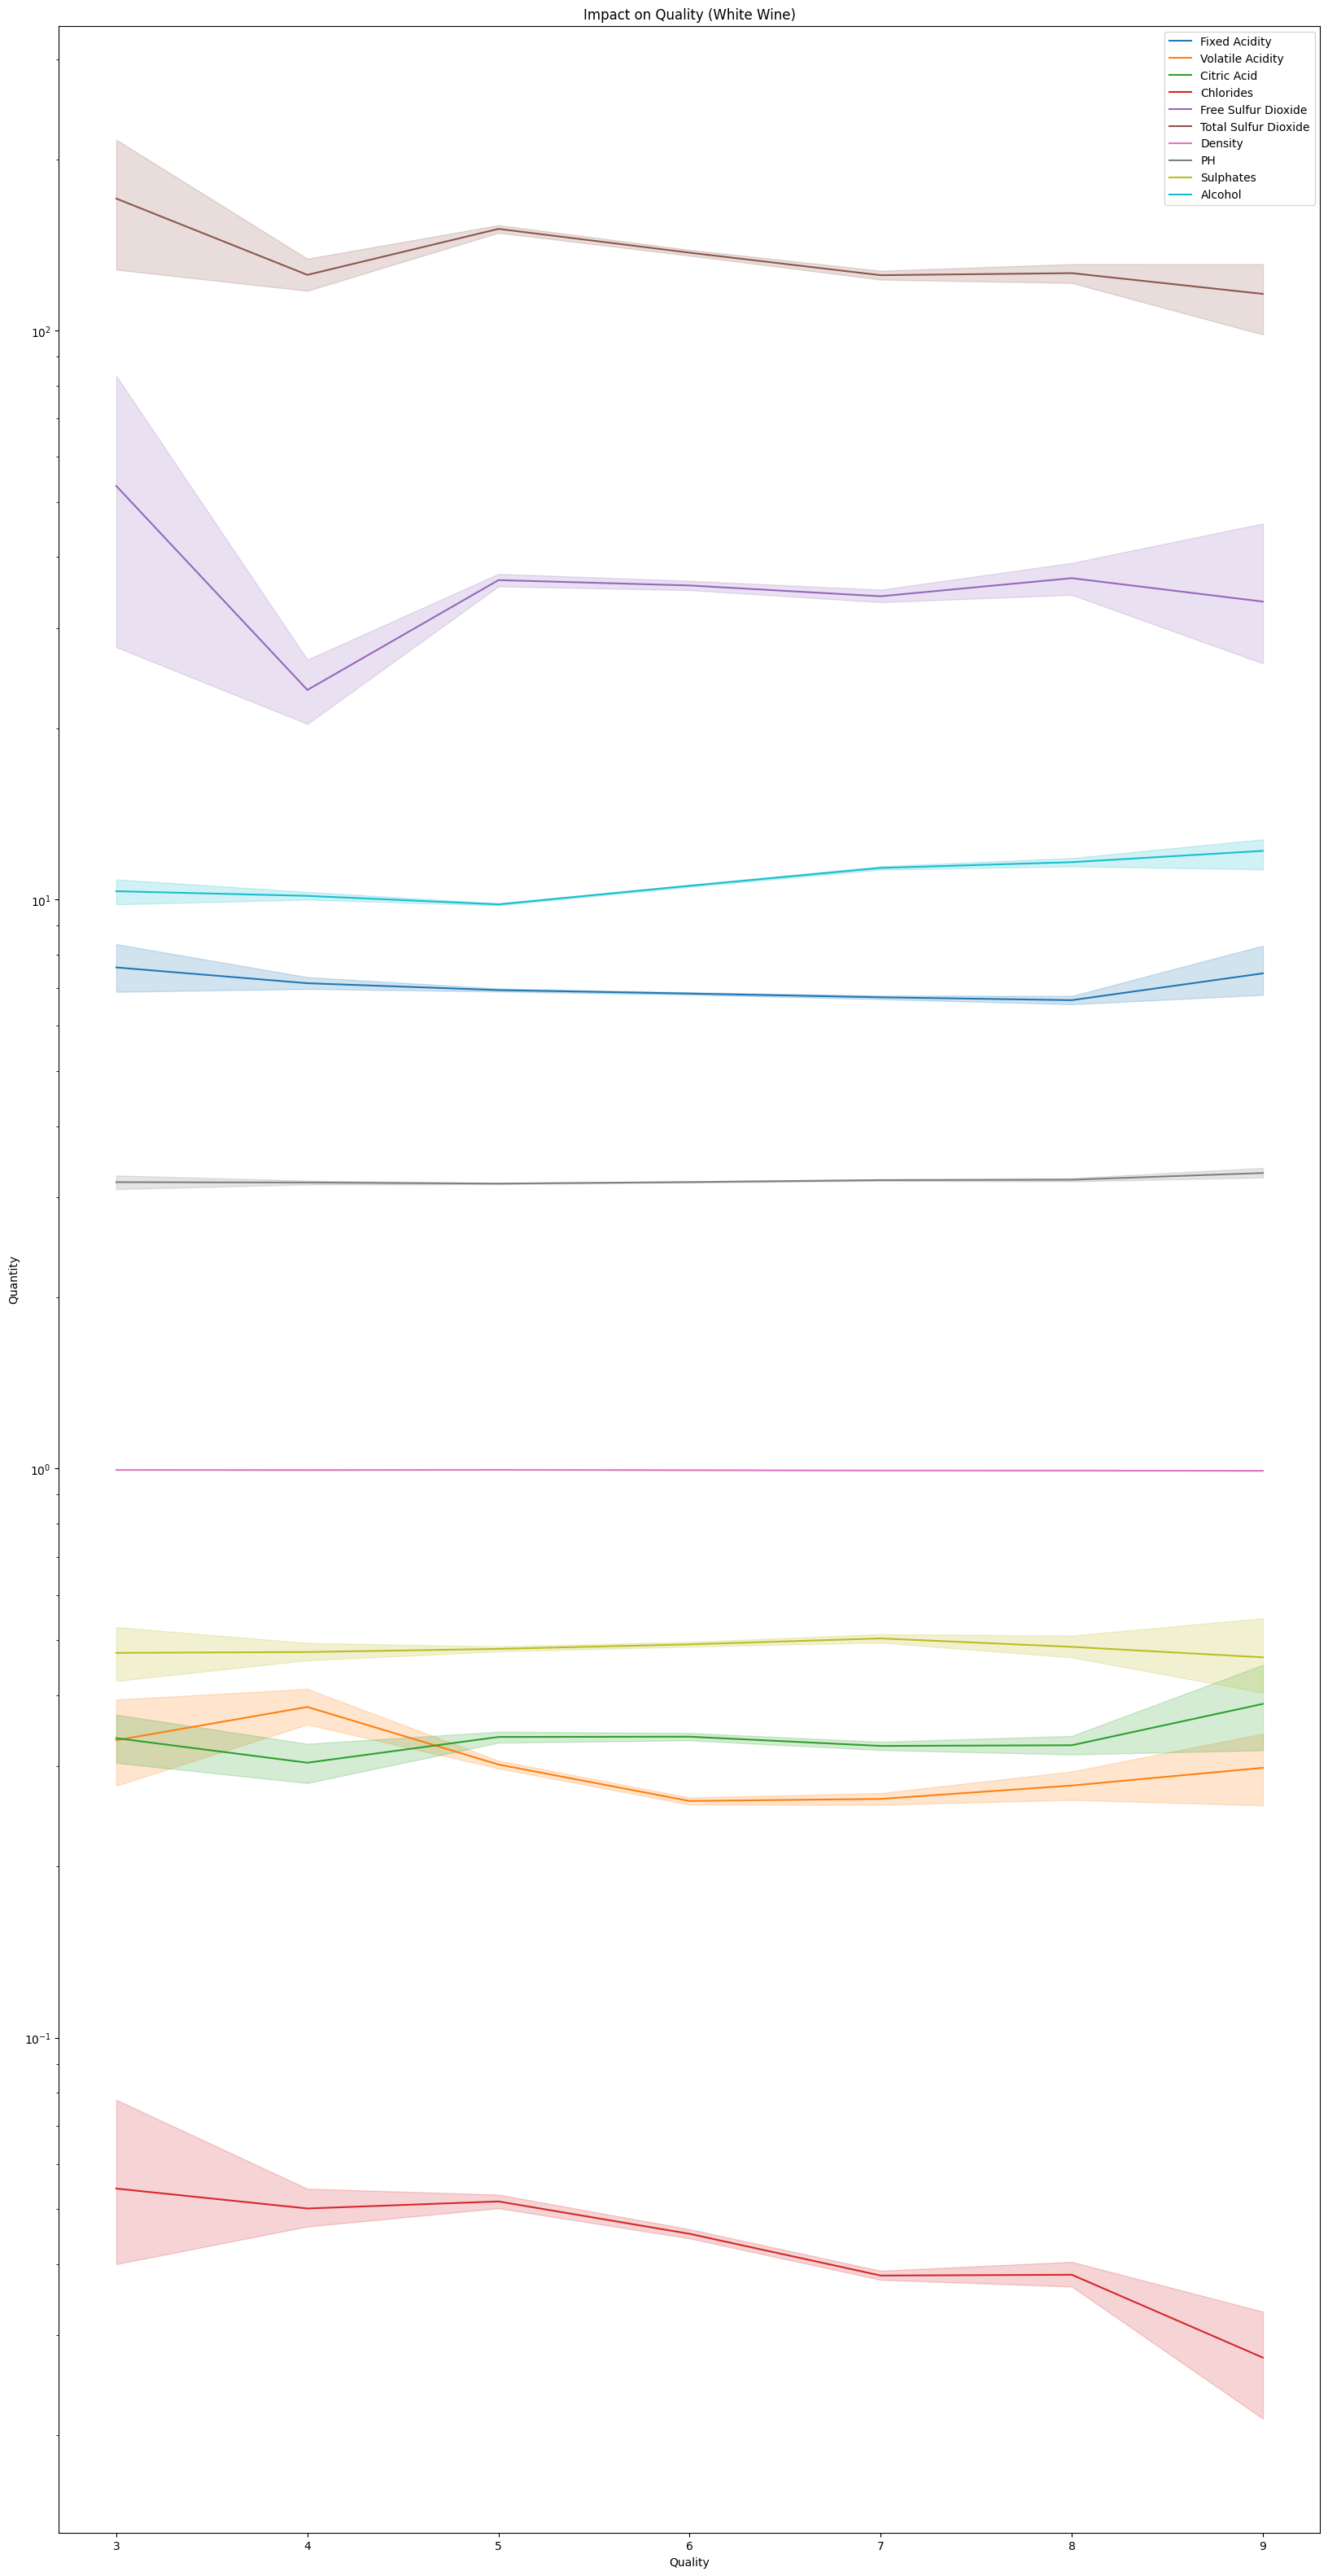

In [15]:
plt.figure(figsize=(20, 40))

sns.lineplot(data=df2, x="quality", y="fixed acidity", label="Fixed Acidity")
sns.lineplot(data=df2, x="quality", y="volatile acidity", label="Volatile Acidity")
sns.lineplot(data=df2, x="quality", y="citric acid", label="Citric Acid")
sns.lineplot(data=df2, x="quality", y="chlorides", label="Chlorides")
sns.lineplot(data=df2, x="quality", y="free sulfur dioxide", label="Free Sulfur Dioxide")
sns.lineplot(data=df2, x="quality", y="total sulfur dioxide", label="Total Sulfur Dioxide")
sns.lineplot(data=df2, x="quality", y="density", label="Density")
sns.lineplot(data=df2, x="quality", y="pH", label="PH")
sns.lineplot(data=df2, x="quality", y="sulphates", label="Sulphates")
sns.lineplot(data=df2, x="quality", y="alcohol", label="Alcohol")
plt.yscale('log') # Apply logarithmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.xlabel("Quality")
plt.title("Impact on Quality (White Wine)")
plt.legend()
plt.show()


* On a quick analysis we can observe that *alchool*, *sulphates*, and *citric acid* may have a positive correlation with wine quality.
* On the other hand, *volatile acidity* and *chlorides* show a negative trend as quality increases.
* The other features show less variation or show no influence with quality.

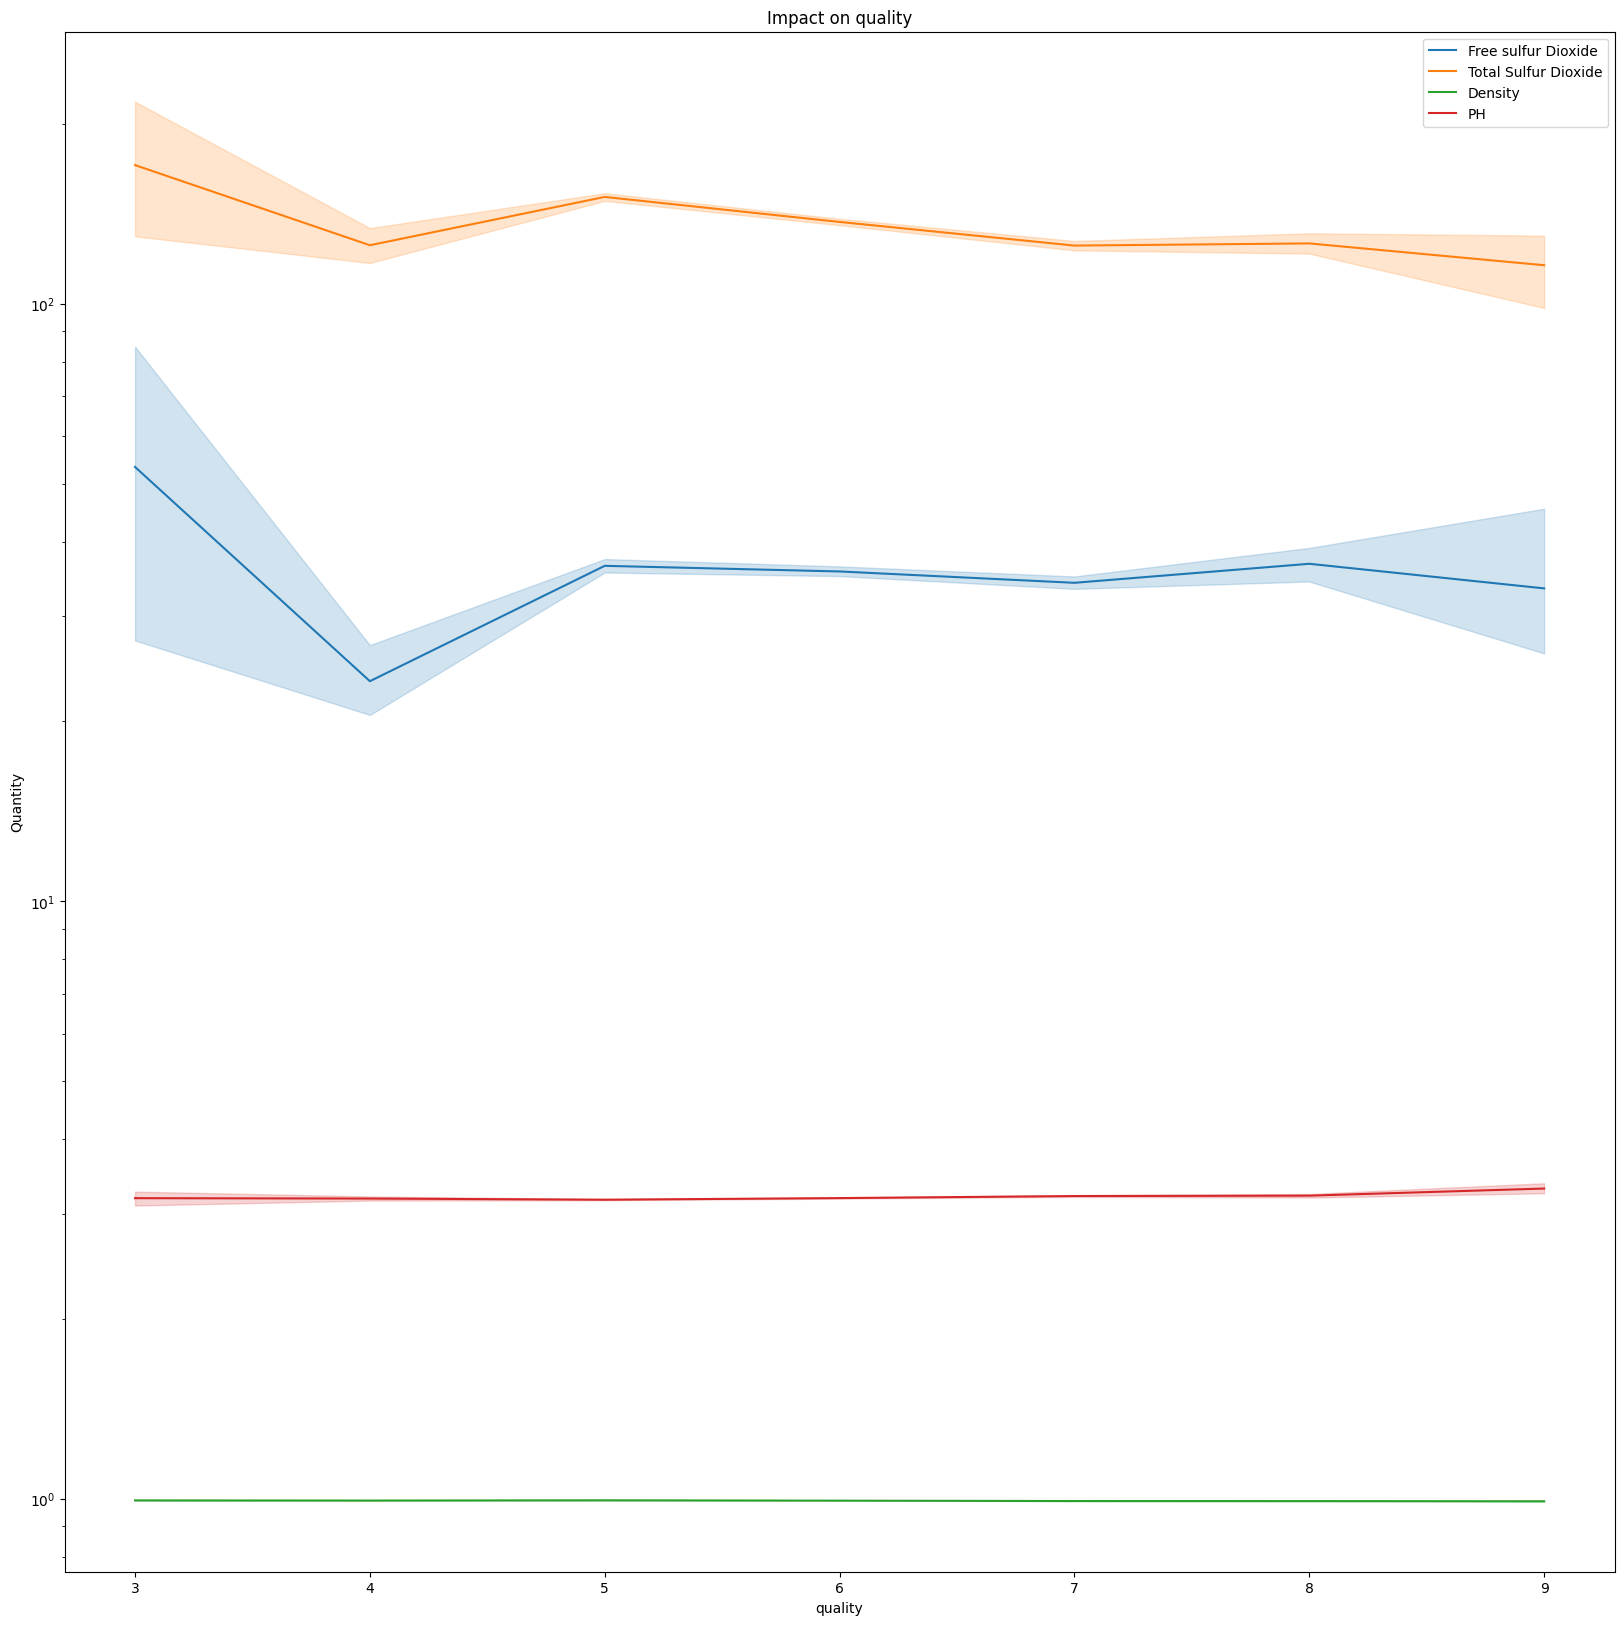

In [16]:
# Ploting only the less influential features

plt.figure(figsize=(20,20))
sns.lineplot(data=df2, x="quality",y="free sulfur dioxide",label="Free sulfur Dioxide")
sns.lineplot(data=df2, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df2, x="quality",y="density",label="Density")
sns.lineplot(data=df2, x="quality",y="pH",label="PH")
plt.yscale('log') # Applied logaritmic scale to better differentiate between chemicals
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

* Ploting again only the less influential features, we can conclude that *density* shows very low variation.
* Both *sulfur dioxide metrics* again show a low influence on quality.
* *pH* shows a very small influence in relation to quality but declines steadly.

#### Correlation Heatmap

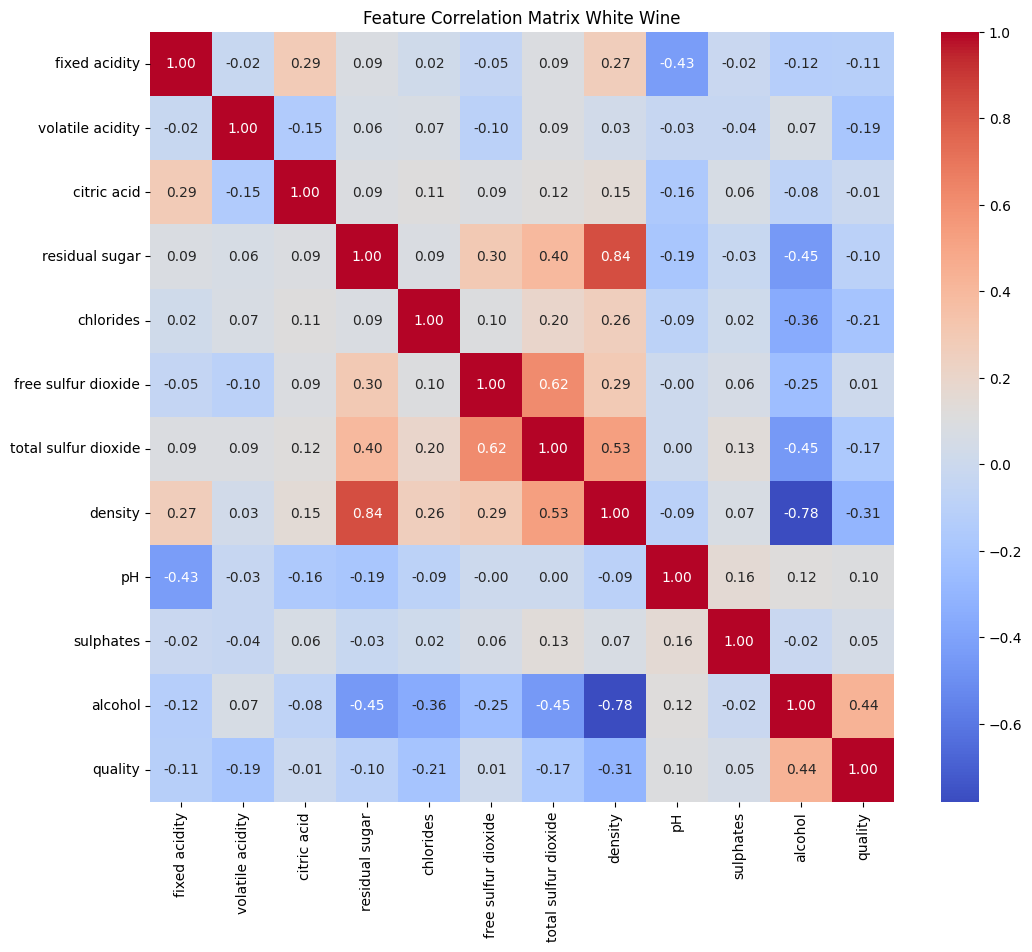

In [17]:
# Correlation Matrix to better analyse what features should be included in the dataset

corr_df2 = df2.corr().drop(index='wine_type', columns='wine_type')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix White Wine")
plt.show()

Observing the heatmap we can observe that:

* *Alcohol* has the strongest positive correlation with *quality*: 0.44;
* *Volatile Acidity* has a moderate negative correlation with *quality*: -0.19;
* *Density* has a moderate negative correlation with *quality*: -0.31;
* *Chlorides* has a weak negative correlation with *quality*: -0.21;
* *Total Sulfur Dioxide* has a weak negative correlation with *quality*: -0.17;
* *Free Sulfur Dioxide*, *pH*, *Citric Acid*, *Fixed Acidity*, and *Residual Sugar* show little to no correlation with *quality*: -0.05, 0.00, -0.11, and -0.10, respectively.

---

* *Residual Sugar <-> Density* show a strong positive correlation: 0.84;
* *Free Sulfur Dioxide <-> Total Sulfur Dioxide* show a moderate positive correlation: 0.62;
* *pH <-> Fixed Acidity* show a strong negative correlation: -0.43.

---

Analyzing this data we can conclude that:

* *Alcohol* is a strong differentiator in wine quality due to its significant positive correlation;
* *Volatile Acidity* and *Density* are sugest they can be usefull predictors of wine quality due to their moderate negative correlations;
* *Chlorides* and *Total Sulfur Dioxide* contribute weakly but could still help differentiate wine quality;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide*, due to their moderate correlation with each other and weak impact on *quality*, suggest that only one of them should be included;
* *pH*, *Fixed Acidity*, *Citric Acid* and *Residual Sugar* have minimal impact on *quality* and could be deprioritized.


#### Random Forest Feature Impact

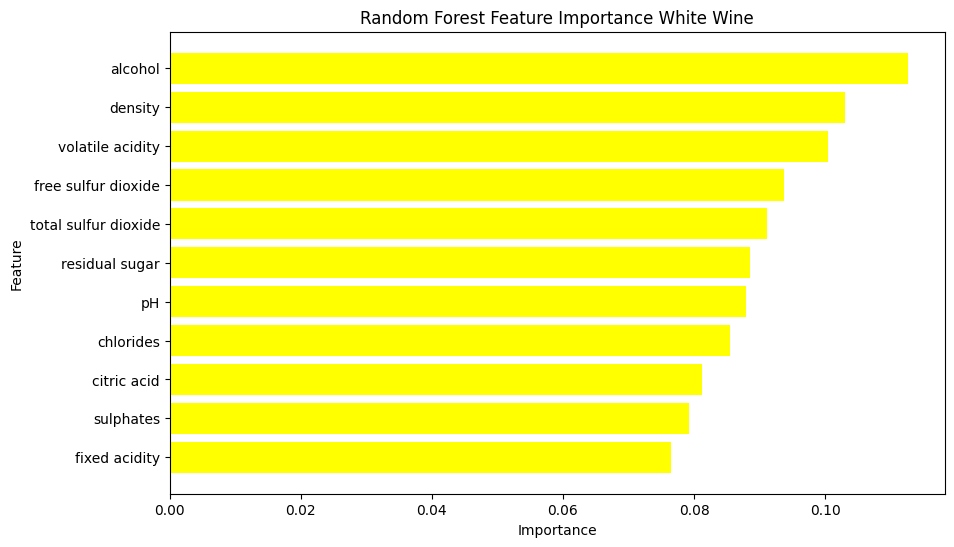

                 Feature  Importance
10               alcohol    0.112605
7                density    0.103044
1       volatile acidity    0.100450
5    free sulfur dioxide    0.093767
6   total sulfur dioxide    0.091105
3         residual sugar    0.088596
8                     pH    0.087975
4              chlorides    0.085530
2            citric acid    0.081229
9              sulphates    0.079225
0          fixed acidity    0.076472


In [18]:
def rffi_white():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Train the Random Forest Classifier
    rf2 = RandomForestClassifier(random_state=1)
    rf2.fit(X_train, y_train)
    
    # Get feature importance
    feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf2.feature_importances_}).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='yellow')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance White Wine')
    plt.gca().invert_yaxis()
    plt.show()
    
    # Display feature importance
    print(feature_importances)

rffi_white()


Analyzing the feature importance from the Random Forest model for white wine, we can observe that:

* *Alcohol* is the most important feature, with a feature importance value of 0.11;
* *Density* is the second most important feature, with a value of 0.10, showing significant impact;
* *Volatile Acidity* shows a significant impact with a feature importance of 0.10;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* have moderate importance, with a value of 0.09;
* *Residual Sugar* has a slightly lower importance, with a value of 0.08;
* *pH* and *Chlorides* contribute weakly, with values of 0.08 and 0.08 respectively;
* *Citric Acid* and *Sulphates* show weaker importance, with values of 0.08 and 0.08;
* *Fixed Acidity* is among the least important features, with a value of 0.07;

---

Analyzing this data we can conclude that:

* *Alcohol* is the most important differentiator in predicting wine quality;
* *Density* and *Volatile Acidity* are strong contributors to differentiating wine quality;
* *Free Sulfur Dioxide* and *Total Sulfur Dioxide*, despite their moderate importance, could overlap in information, suggesting that only one might be kept;
* *Residual Sugar* plays a moderate role and contributes indirectly;
* *pH* and *Chlorides* provide weak predictive power but might still be retained for interaction effects;
* *Citric Acid*, *Sulphates*, and *Fixed Acidity* contribute minimally to quality predictions and could potentially be deprioritized.


## Feature Selection

Using the information obtained from the previous feature analysis, we can conclude:

* *Free Sulfur Dioxide* and *Total Sulfur Dioxide* to this problem are redudant, since *Free Sulfur Dioxide* is included *Total Sulfur Dioxide* measurement. So only *Total Sulfur Dioxide* should be included.
* Even tought in White Wine, *Citric Acid* shows low correlation to *Quality* it still should be considered since it has a moderate negative correlation to quality in Red Wine. But when included in the selected features, because of its wide range is low quality wines really negativelly impacts the classification.

So, the final selected features for **Red Wine** are:

* Alcohol;
* Density;
* Sulphates;
* Volatile Acidity;
* Total Sulfur Dioxide;
* Fixed Acidity;
* Chlorides.

So, the final selected features for **White Wine** are:

* Alcohol;
* Density;
* Volatile Acidity;
* Total Sulfur Dioxide;
* Chlorides;
* Residual Sugar;
* pH.


## Classifier Full Dataset

### Computation time tracker function

In [19]:
training_time_list = []
inference_time_list = []

def comp_time_eval(model, X_train, X_test, y_train, y_test):
    
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)
    
    print(rep)

    return {'Training Time (s)': training_time,'Inference Time (s)': inference_time}, training_time, inference_time


### Red Wine

#### Decision Tree Classifier - selected features

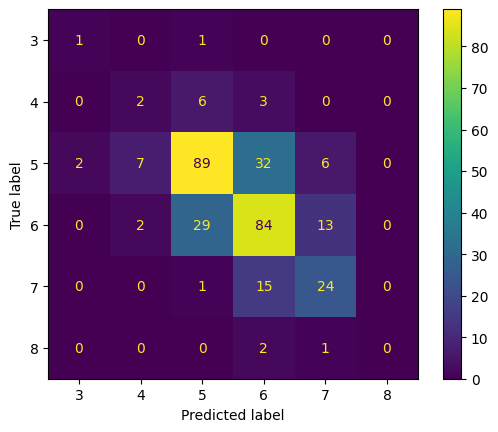

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.18      0.18      0.18        11
           5       0.71      0.65      0.68       136
           6       0.62      0.66      0.64       128
           7       0.55      0.60      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.40      0.43      0.41       320
weighted avg       0.62      0.62      0.62       320

{'Training Time (s)': 0.02806, 'Inference Time (s)': 0.00557}


(0.02806, 0.00557)

In [20]:
def RedDTC():
    X = df1[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTC()

#### Decision Tree Classifier - all features

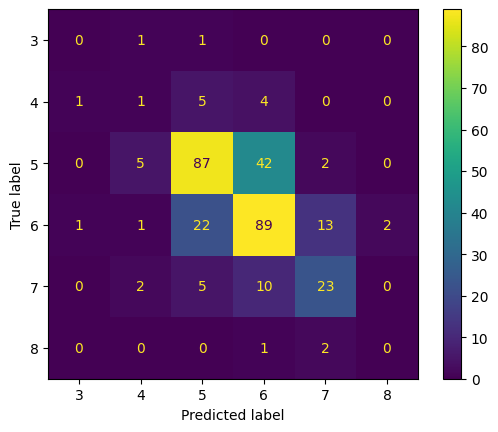

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.09      0.10        11
           5       0.72      0.64      0.68       136
           6       0.61      0.70      0.65       128
           7       0.57      0.57      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.62      0.62       320

{'Training Time (s)': 0.0279, 'Inference Time (s)': 0.00201}


(0.0279, 0.00201)

In [21]:
def RedDTC2():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTC2()

#### Random Tree Classifier - selected features

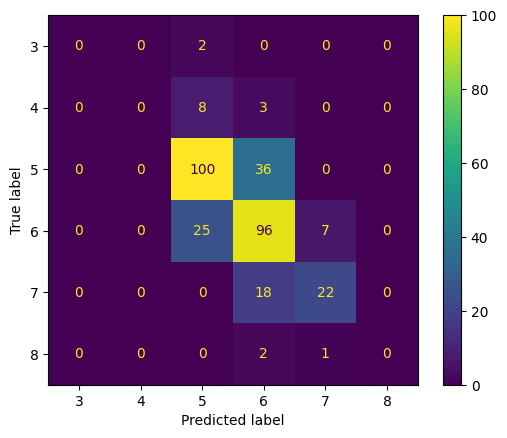

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.74      0.74       136
           6       0.62      0.75      0.68       128
           7       0.73      0.55      0.63        40
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.65      0.68      0.66       320

{'Training Time (s)': 1.8769, 'Inference Time (s)': 0.05175}


(1.8769, 0.05175)

In [22]:
def RedRTC():
    X = df1[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTC()

#### Random Tree Classifier - all features

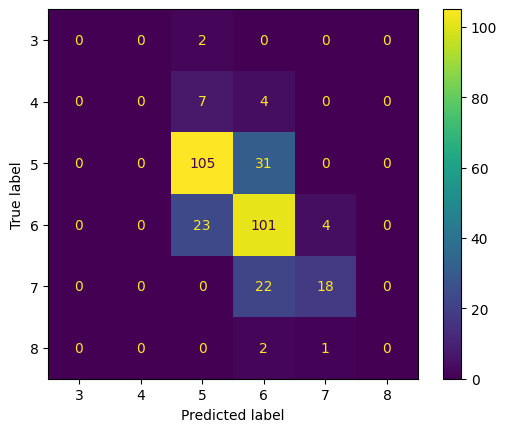

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.77      0.77       136
           6       0.63      0.79      0.70       128
           7       0.78      0.45      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.36      0.34      0.34       320
weighted avg       0.68      0.70      0.68       320

{'Training Time (s)': 2.34419, 'Inference Time (s)': 0.04996}


(2.34419, 0.04996)

In [23]:
def RedRTC2():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTC2()

#### SVM - selected features

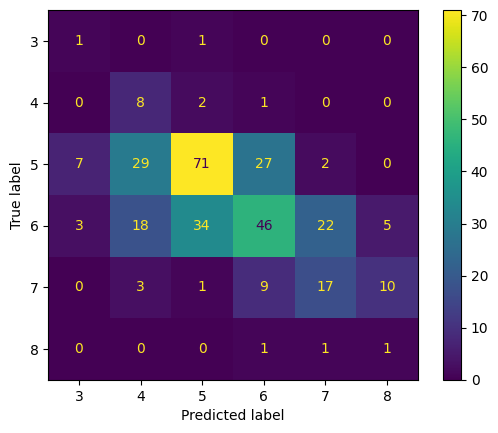

              precision    recall  f1-score   support

           3       0.09      0.50      0.15         2
           4       0.14      0.73      0.23        11
           5       0.65      0.52      0.58       136
           6       0.55      0.36      0.43       128
           7       0.40      0.42      0.41        40
           8       0.06      0.33      0.11         3

    accuracy                           0.45       320
   macro avg       0.32      0.48      0.32       320
weighted avg       0.55      0.45      0.48       320



(0.24056, 0.03603)

In [24]:
def RedSVM():
    X = df1[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

RedSVM()

#### SVM - all features

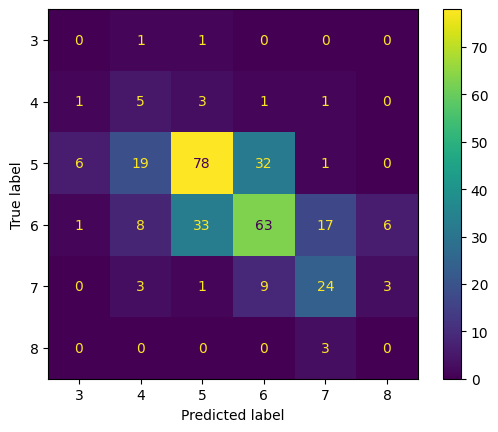

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.45      0.21        11
           5       0.67      0.57      0.62       136
           6       0.60      0.49      0.54       128
           7       0.52      0.60      0.56        40
           8       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.32      0.35      0.32       320
weighted avg       0.60      0.53      0.56       320



(0.23011, 0.03537)

In [25]:
def RedSVM2():
    X = df1.drop(columns=['quality','wine_type'])
    y = df1['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

RedSVM2()

### White Wine

#### Decision Tree Classifier - selected features

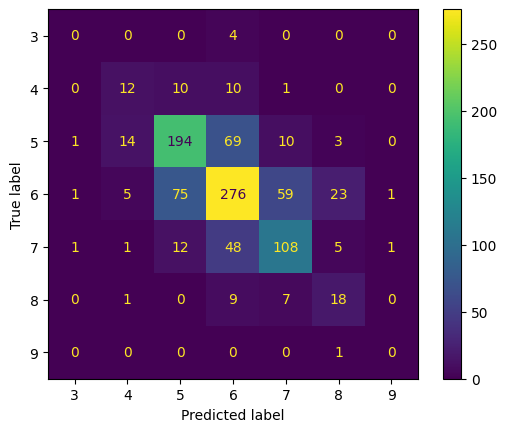

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.36      0.36      0.36        33
           5       0.67      0.67      0.67       291
           6       0.66      0.63      0.64       440
           7       0.58      0.61      0.60       176
           8       0.36      0.51      0.42        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.38      0.40      0.39       980
weighted avg       0.63      0.62      0.62       980

{'Training Time (s)': 0.06915, 'Inference Time (s)': 0.00174}


(0.06915, 0.00174)

In [26]:
def WhiteDTC():
    X = df2[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]
    
WhiteDTC()

#### Decision Tree Classifier - all features

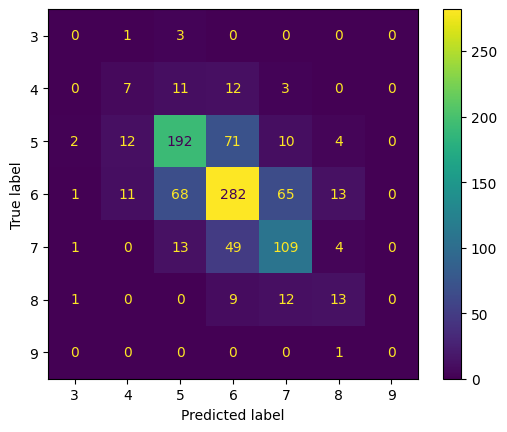

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.23      0.21      0.22        33
           5       0.67      0.66      0.66       291
           6       0.67      0.64      0.65       440
           7       0.55      0.62      0.58       176
           8       0.37      0.37      0.37        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.35      0.36      0.36       980
weighted avg       0.62      0.62      0.62       980

{'Training Time (s)': 0.08906, 'Inference Time (s)': 0.00151}


(0.08906, 0.00151)

In [27]:
def WhiteDTC2():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteDTC2()

#### Random Tree Classifier - selected features

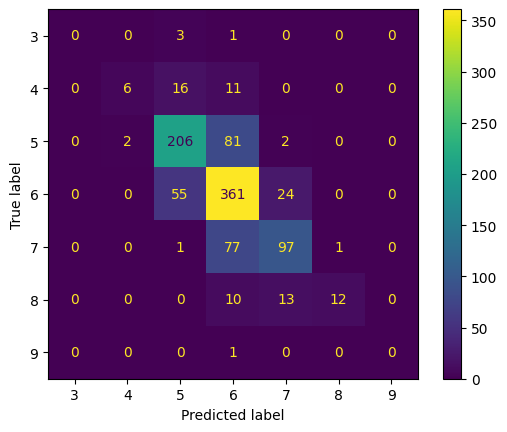

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.75      0.18      0.29        33
           5       0.73      0.71      0.72       291
           6       0.67      0.82      0.74       440
           7       0.71      0.55      0.62       176
           8       0.92      0.34      0.50        35
           9       0.00      0.00      0.00         1

    accuracy                           0.70       980
   macro avg       0.54      0.37      0.41       980
weighted avg       0.70      0.70      0.68       980

{'Training Time (s)': 5.0673, 'Inference Time (s)': 0.1609}


(5.0673, 0.1609)

In [28]:
def WhiteRTC():
    X = df2[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTC()

#### Random Tree Classifier - all features

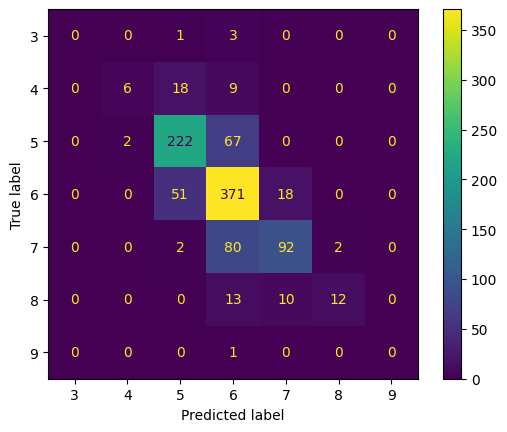

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.75      0.18      0.29        33
           5       0.76      0.76      0.76       291
           6       0.68      0.84      0.75       440
           7       0.77      0.52      0.62       176
           8       0.86      0.34      0.49        35
           9       0.00      0.00      0.00         1

    accuracy                           0.72       980
   macro avg       0.54      0.38      0.42       980
weighted avg       0.72      0.72      0.70       980

{'Training Time (s)': 6.55552, 'Inference Time (s)': 0.12978}


(6.55552, 0.12978)

In [29]:
def WhiteRTC2():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTC2()

#### SVM - selected features

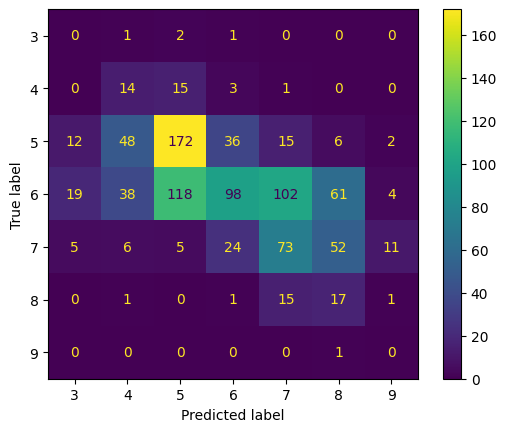

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.13      0.42      0.20        33
           5       0.55      0.59      0.57       291
           6       0.60      0.22      0.33       440
           7       0.35      0.41      0.38       176
           8       0.12      0.49      0.20        35
           9       0.00      0.00      0.00         1

    accuracy                           0.38       980
   macro avg       0.25      0.31      0.24       980
weighted avg       0.51      0.38      0.40       980



(3.11532, 0.41353)

In [30]:
def WhiteSVM():
    X = df2[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

WhiteSVM()

#### SVM - all features

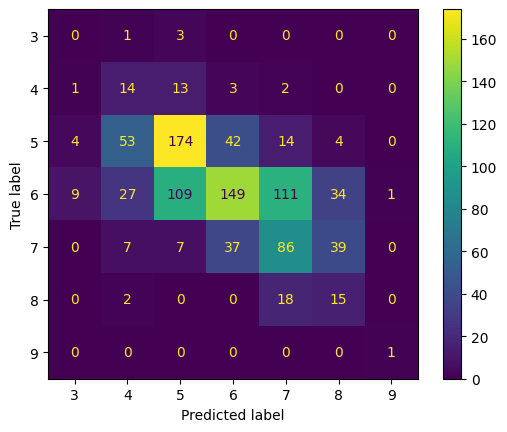

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.13      0.42      0.20        33
           5       0.57      0.60      0.58       291
           6       0.65      0.34      0.44       440
           7       0.37      0.49      0.42       176
           8       0.16      0.43      0.24        35
           9       0.50      1.00      0.67         1

    accuracy                           0.45       980
   macro avg       0.34      0.47      0.37       980
weighted avg       0.54      0.45      0.46       980



(2.8513, 0.42485)

In [31]:
def WhiteSVM2():
    X = df2.drop(columns=['quality','wine_type'])
    y = df2['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

WhiteSVM2()

## Classifier Half Dataset

### Red Wine

#### Decision Tree Classifier - selected features

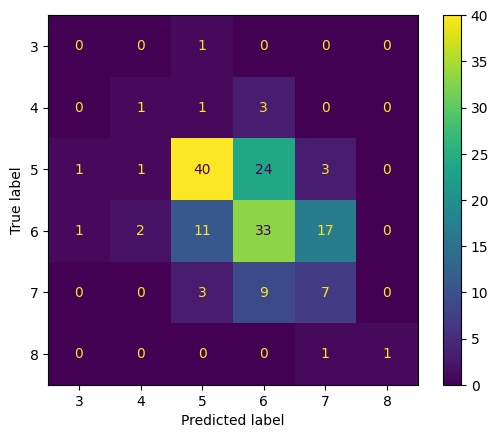

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.20      0.22         5
           5       0.71      0.58      0.64        69
           6       0.48      0.52      0.50        64
           7       0.25      0.37      0.30        19
           8       1.00      0.50      0.67         2

    accuracy                           0.51       160
   macro avg       0.45      0.36      0.39       160
weighted avg       0.55      0.51      0.53       160

{'Training Time (s)': 0.01054, 'Inference Time (s)': 0.00178}


(0.01054, 0.00178)

In [32]:
def RedDTCr():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTCr()

#### Decision Tree Classifier - all features

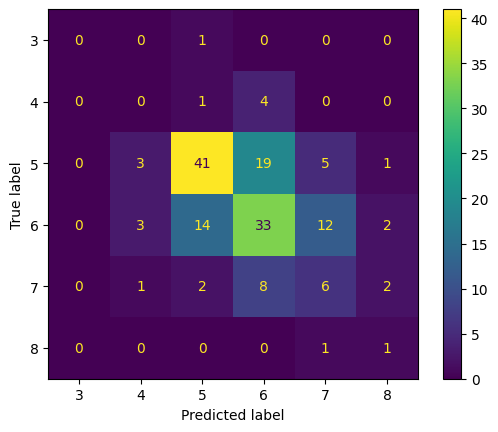

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.69      0.59      0.64        69
           6       0.52      0.52      0.52        64
           7       0.25      0.32      0.28        19
           8       0.17      0.50      0.25         2

    accuracy                           0.51       160
   macro avg       0.27      0.32      0.28       160
weighted avg       0.54      0.51      0.52       160

{'Training Time (s)': 0.02029, 'Inference Time (s)': 0.00302}


(0.02029, 0.00302)

In [33]:
def RedDTC2r():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced.drop(columns=['quality','wine_type'])
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedDTC2r()

#### Random Tree Classifier - selected features

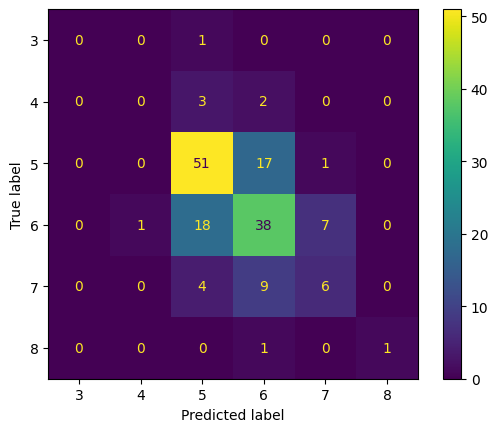

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.66      0.74      0.70        69
           6       0.57      0.59      0.58        64
           7       0.43      0.32      0.36        19
           8       1.00      0.50      0.67         2

    accuracy                           0.60       160
   macro avg       0.44      0.36      0.38       160
weighted avg       0.58      0.60      0.58       160

{'Training Time (s)': 1.24055, 'Inference Time (s)': 0.0383}


(1.24055, 0.0383)

In [34]:
def RedRTCr():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTCr()

#### Random Tree Classifier - all features

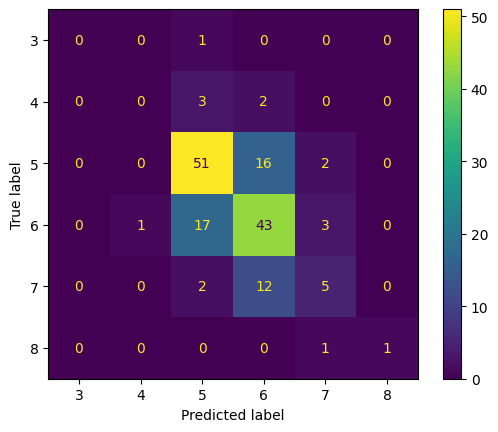

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.69      0.74      0.71        69
           6       0.59      0.67      0.63        64
           7       0.45      0.26      0.33        19
           8       1.00      0.50      0.67         2

    accuracy                           0.62       160
   macro avg       0.46      0.36      0.39       160
weighted avg       0.60      0.62      0.61       160

{'Training Time (s)': 1.46288, 'Inference Time (s)': 0.03781}


(1.46288, 0.03781)

In [35]:
def RedRTC2r():
    df1_reduced = df1.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df1_reduced.drop(columns=['quality','wine_type'])
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

RedRTC2r()

#### SVM - selected features

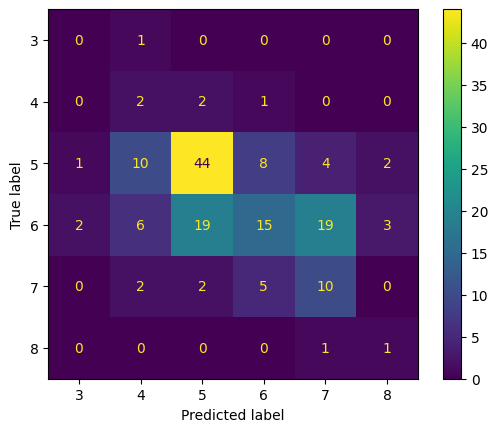

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.40      0.15         5
           5       0.66      0.64      0.65        69
           6       0.52      0.23      0.32        64
           7       0.29      0.53      0.38        19
           8       0.17      0.50      0.25         2

    accuracy                           0.45       160
   macro avg       0.29      0.38      0.29       160
weighted avg       0.53      0.45      0.46       160



(0.03323, 0.0093)

In [36]:
def RedSVMr():
    df1_reduced = df1.sample(frac=0.5, random_state=1)
    X = df1_reduced[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    #smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

RedSVMr()

#### SVM - all features

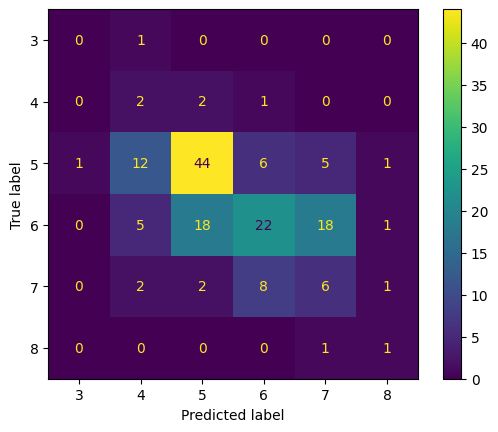

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.40      0.15         5
           5       0.67      0.64      0.65        69
           6       0.59      0.34      0.44        64
           7       0.20      0.32      0.24        19
           8       0.25      0.50      0.33         2

    accuracy                           0.47       160
   macro avg       0.30      0.37      0.30       160
weighted avg       0.56      0.47      0.49       160



(0.04606, 0.00777)

In [37]:
def RedSVM2r():
    df1_reduced = df1.sample(frac=0.5, random_state=1)
    X = df1_reduced.drop(columns=['quality','wine_type'])
    y = df1_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    #smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)

    return training_time, inference_time

RedSVM2r()

### White Wine

#### Decision Tree Classifier - selected features

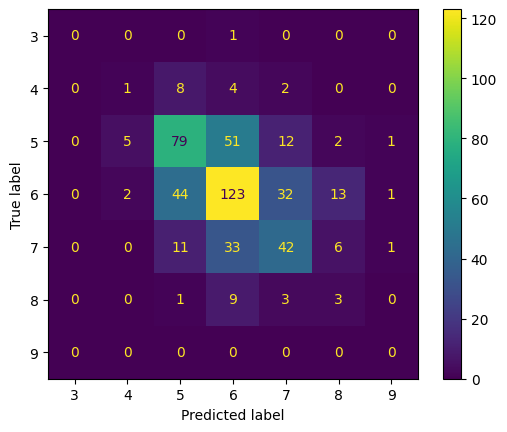

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.07      0.09        15
           5       0.55      0.53      0.54       150
           6       0.56      0.57      0.56       215
           7       0.46      0.45      0.46        93
           8       0.12      0.19      0.15        16
           9       0.00      0.00      0.00         0

    accuracy                           0.51       490
   macro avg       0.26      0.26      0.26       490
weighted avg       0.51      0.51      0.51       490

{'Training Time (s)': 0.0486, 'Inference Time (s)': 0.00358}


(0.0486, 0.00358)

In [38]:
def WhiteDTCr():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]
    
WhiteDTCr()

#### Decision Tree Classifier - all features

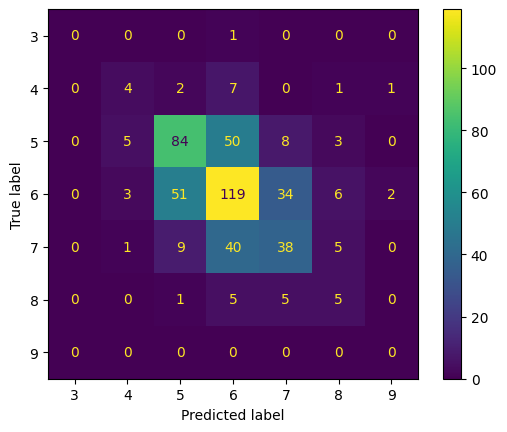

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.31      0.27      0.29        15
           5       0.57      0.56      0.57       150
           6       0.54      0.55      0.54       215
           7       0.45      0.41      0.43        93
           8       0.25      0.31      0.28        16
           9       0.00      0.00      0.00         0

    accuracy                           0.51       490
   macro avg       0.30      0.30      0.30       490
weighted avg       0.51      0.51      0.51       490

{'Training Time (s)': 0.06213, 'Inference Time (s)': 0.00208}


(0.06213, 0.00208)

In [39]:
def WhiteDTC2r():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced.drop(columns=['quality','wine_type'])
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = DecisionTreeClassifier(random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteDTC2r()

#### Random Tree Classifier - selected features

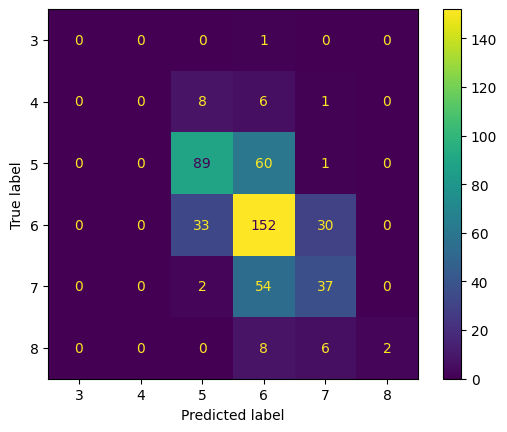

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.67      0.59      0.63       150
           6       0.54      0.71      0.61       215
           7       0.49      0.40      0.44        93
           8       1.00      0.12      0.22        16

    accuracy                           0.57       490
   macro avg       0.45      0.30      0.32       490
weighted avg       0.57      0.57      0.55       490

{'Training Time (s)': 3.3558, 'Inference Time (s)': 0.0769}


(3.3558, 0.0769)

In [40]:
def WhiteRTCr():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced[['alcohol','density','volatile acidity','total sulfur dioxide','chlorides','residual sugar','pH']]
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTCr()

#### Random Tree Classifier - all features

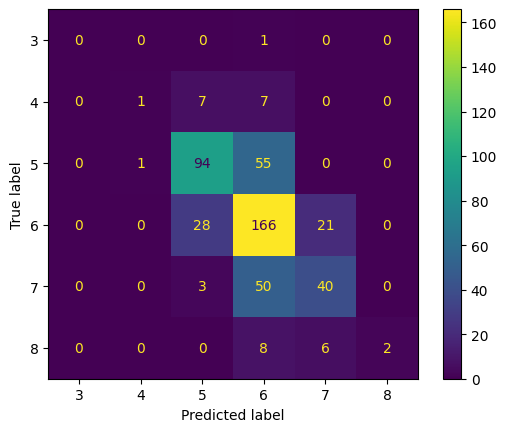

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.07      0.12        15
           5       0.71      0.63      0.67       150
           6       0.58      0.77      0.66       215
           7       0.60      0.43      0.50        93
           8       1.00      0.12      0.22        16

    accuracy                           0.62       490
   macro avg       0.56      0.34      0.36       490
weighted avg       0.63      0.62      0.60       490

{'Training Time (s)': 3.4363, 'Inference Time (s)': 0.09389}


(3.4363, 0.09389)

In [41]:
def WhiteRTC2r():
    df2_reduced = df2.sample(frac=0.5, random_state=1)  # 50% of the dataset
    X = df2_reduced.drop(columns=['quality','wine_type'])
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
    model = RandomForestClassifier(n_estimators=500, random_state=1, class_weight='balanced') #classes are unbalanced

    performance = comp_time_eval(model, X_train, X_test, y_train, y_test)

    print (performance[0])
    
    return performance[1], performance[2]

WhiteRTC2r()

#### SVM - selected features

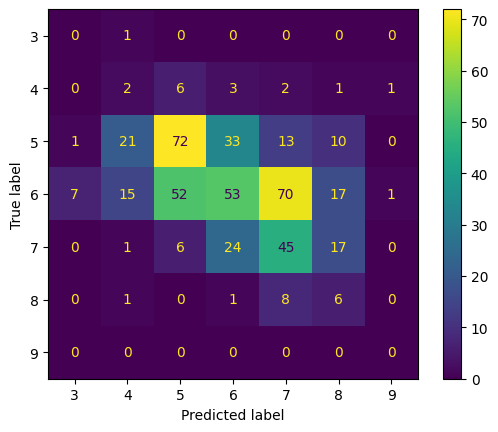

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.05      0.13      0.07        15
           5       0.53      0.48      0.50       150
           6       0.46      0.25      0.32       215
           7       0.33      0.48      0.39        93
           8       0.12      0.38      0.18        16
           9       0.00      0.00      0.00         0

    accuracy                           0.36       490
   macro avg       0.21      0.25      0.21       490
weighted avg       0.43      0.36      0.38       490



(0.22128, 0.05056)

In [42]:
def WhiteSVMr():
    df2_reduced = df2.sample(frac=0.5, random_state=1)
    X = df2_reduced[['alcohol','density','sulphates','volatile acidity','total sulfur dioxide','fixed acidity','chlorides']]
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    #smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

WhiteSVMr()

#### SVM - all features

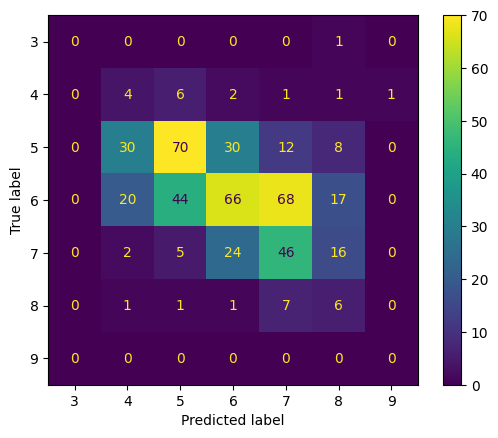

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.27      0.11        15
           5       0.56      0.47      0.51       150
           6       0.54      0.31      0.39       215
           7       0.34      0.49      0.41        93
           8       0.12      0.38      0.18        16
           9       0.00      0.00      0.00         0

    accuracy                           0.39       490
   macro avg       0.23      0.27      0.23       490
weighted avg       0.48      0.39      0.41       490



(0.23495, 0.04864)

In [43]:
def WhiteSVM2r():
    df2_reduced = df2.sample(frac=0.5, random_state=1)
    X = df2_reduced.drop(columns=['quality','wine_type'])
    y = df2_reduced['quality']
    
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle data imbalance using SMOTE (oversampling)
    #smote = SMOTE(random_state=1,k_neighbors=min(3, len(X_train) - 1))
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = svm.SVC(decision_function_shape='ovo',class_weight='balanced')

    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train
    training_time = round(training_time,5)

    # Measure inference time
    start_infer = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_infer
    inference_time = round(inference_time,5)

    # Calculate metrics
    rep = classification_report(y_test, y_pred, zero_division=0)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    # Append results to lists
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

    print(rep)
    
    return training_time, inference_time

WhiteSVM2r()

## Plots

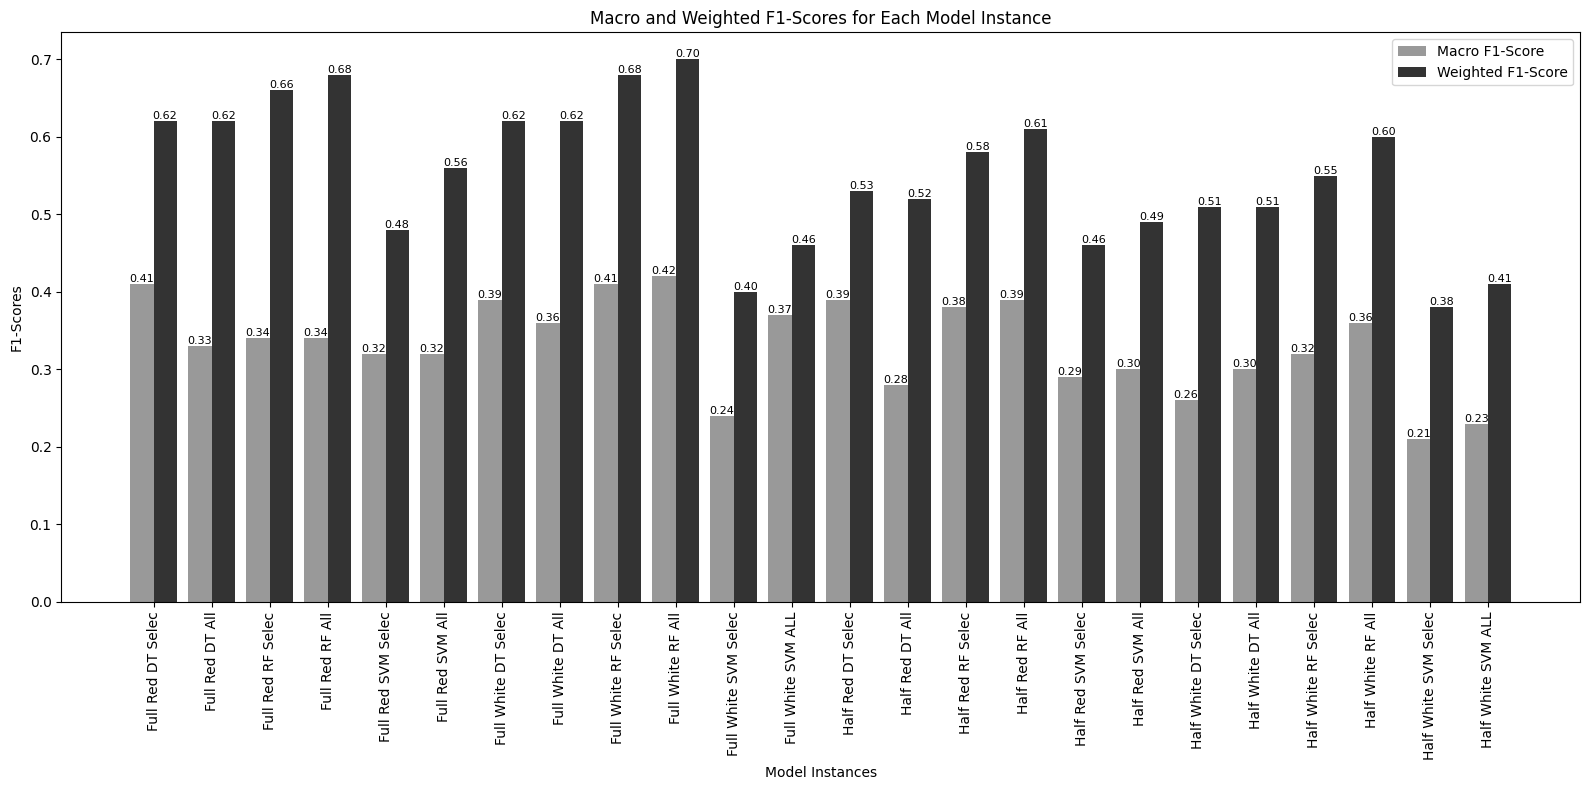

In [52]:
import matplotlib.pyplot as plt

# Provided data
model_instances = [
    'Full Red DT Selec', 'Full Red DT All', 'Full Red RF Selec', 'Full Red RF All', 'Full Red SVM Selec', 'Full Red SVM All',
    'Full White DT Selec', 'Full White DT All', 'Full White RF Selec', 'Full White RF All', 'Full White SVM Selec', 'Full White SVM ALL',
    'Half Red DT Selec', 'Half Red DT All', 'Half Red RF Selec', 'Half Red RF All', 'Half Red SVM Selec', 'Half Red SVM All',
    'Half White DT Selec', 'Half White DT All', 'Half White RF Selec', 'Half White RF All', 'Half White SVM Selec', 'Half White SVM ALL'
]
f1_macro_specific = [0.41, 0.33, 0.34, 0.34, 0.32, 0.32, 0.39, 0.36, 0.41, 0.42, 0.24, 0.37, 0.39, 0.28, 0.38, 0.39, 0.29, 0.30, 0.26, 0.30, 0.32, 0.36, 0.21, 0.23]
f1_weighted_specific = [0.62, 0.62, 0.66, 0.68, 0.48, 0.56, 0.62, 0.62, 0.68, 0.70, 0.40, 0.46, 0.53, 0.52, 0.58, 0.61, 0.46, 0.49, 0.51, 0.51, 0.55, 0.60, 0.38, 0.41]

# Plotting the F1-scores
x = range(len(model_instances))  # X-axis positions

plt.figure(figsize=(16, 8))

# Plot Macro F1-Score bars
bars_macro = plt.bar(x, f1_macro_specific, width=0.4, label='Macro F1-Score', align='center', color='gray', alpha=0.8)
# Plot Weighted F1-Score bars
bars_weighted = plt.bar([p + 0.4 for p in x], f1_weighted_specific, width=0.4, label='Weighted F1-Score', align='center', color='black', alpha=0.8)

# Add values on the top of the bars
for bar in bars_macro:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)
for bar in bars_weighted:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Adding labels, title, and legend
plt.xticks([p + 0.2 for p in x], model_instances, rotation=90, ha='center')  # Adjust x-ticks to align with bars
plt.xlabel('Model Instances')
plt.ylabel('F1-Scores')
plt.title('Macro and Weighted F1-Scores for Each Model Instance')
plt.legend(loc='best')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [45]:
print(len(training_time_list))
print(len(inference_time_list))

24
24


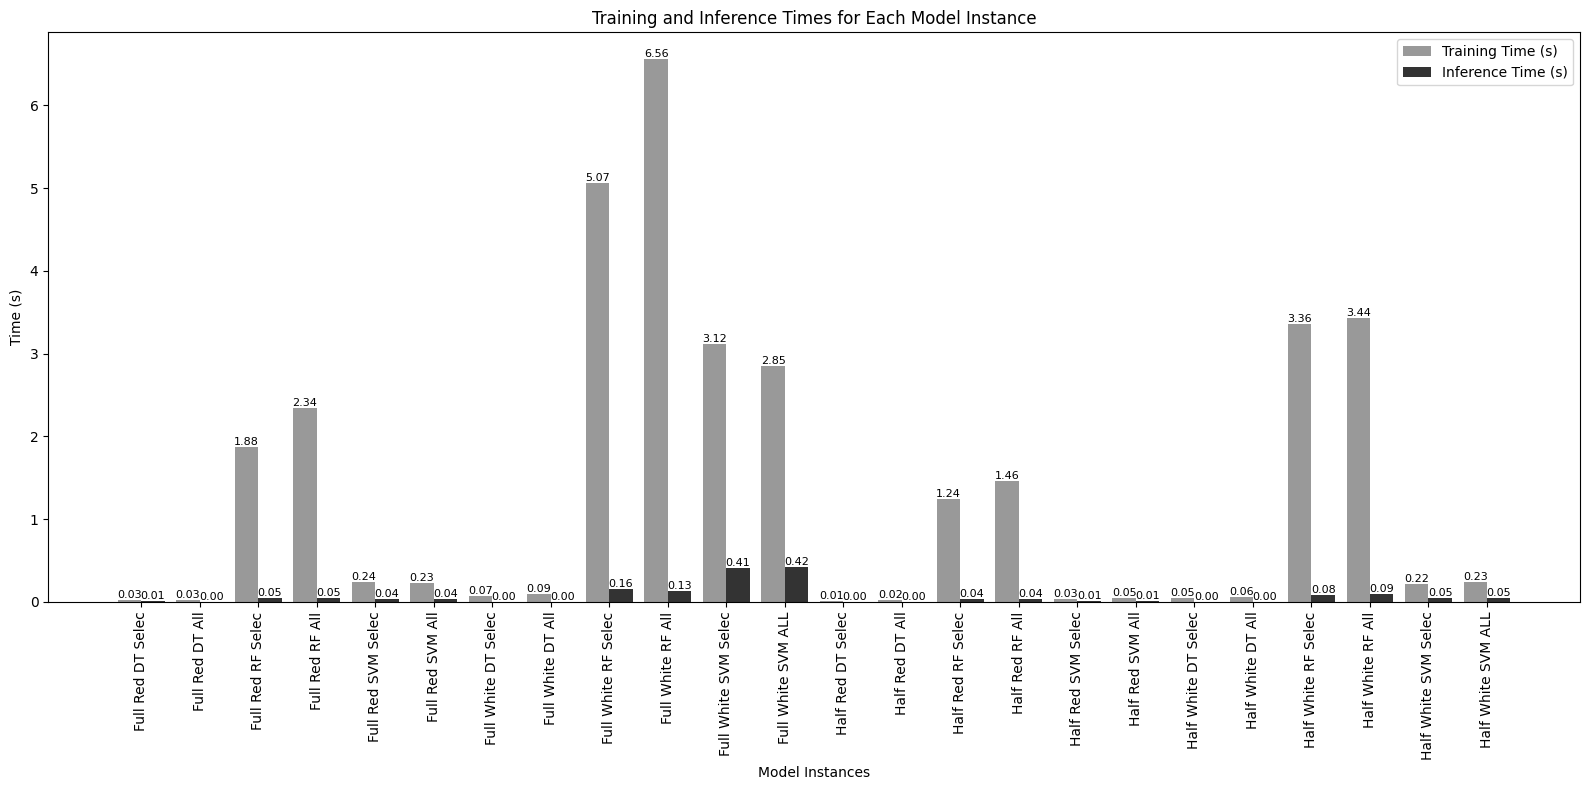

In [46]:
import matplotlib.pyplot as plt

# Replace these with your actual timing data
model_instances = [
    'Full Red DT Selec', 'Full Red DT All', 'Full Red RF Selec', 'Full Red RF All', 'Full Red SVM Selec', 'Full Red SVM All',
    'Full White DT Selec', 'Full White DT All', 'Full White RF Selec', 'Full White RF All', 'Full White SVM Selec', 'Full White SVM ALL',
    'Half Red DT Selec', 'Half Red DT All', 'Half Red RF Selec', 'Half Red RF All', 'Half Red SVM Selec', 'Half Red SVM All',
    'Half White DT Selec', 'Half White DT All', 'Half White RF Selec', 'Half White RF All', 'Half White SVM Selec', 'Half White SVM ALL'
]

# Plotting the training and inference times
x = range(len(model_instances))  # X-axis positions

plt.figure(figsize=(16, 8))

# Plot training times
bars_training = plt.bar(x, training_time_list, width=0.4, label='Training Time (s)', align='center', color='gray', alpha=0.8)
# Plot inference times
bars_inference = plt.bar([p + 0.4 for p in x], inference_time_list, width=0.4, label='Inference Time (s)', align='center', color='black', alpha=0.8)

# Add values on top of the bars
for bar in bars_training:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)
for bar in bars_inference:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Adding labels, title, and legend
plt.xticks([p + 0.2 for p in x], model_instances, rotation=90, ha='center')  # Adjust x-ticks to align with bars
plt.xlabel('Model Instances')
plt.ylabel('Time (s)')
plt.title('Training and Inference Times for Each Model Instance')
plt.legend(loc='best')

# Adjust layout and display
plt.tight_layout()
plt.show()

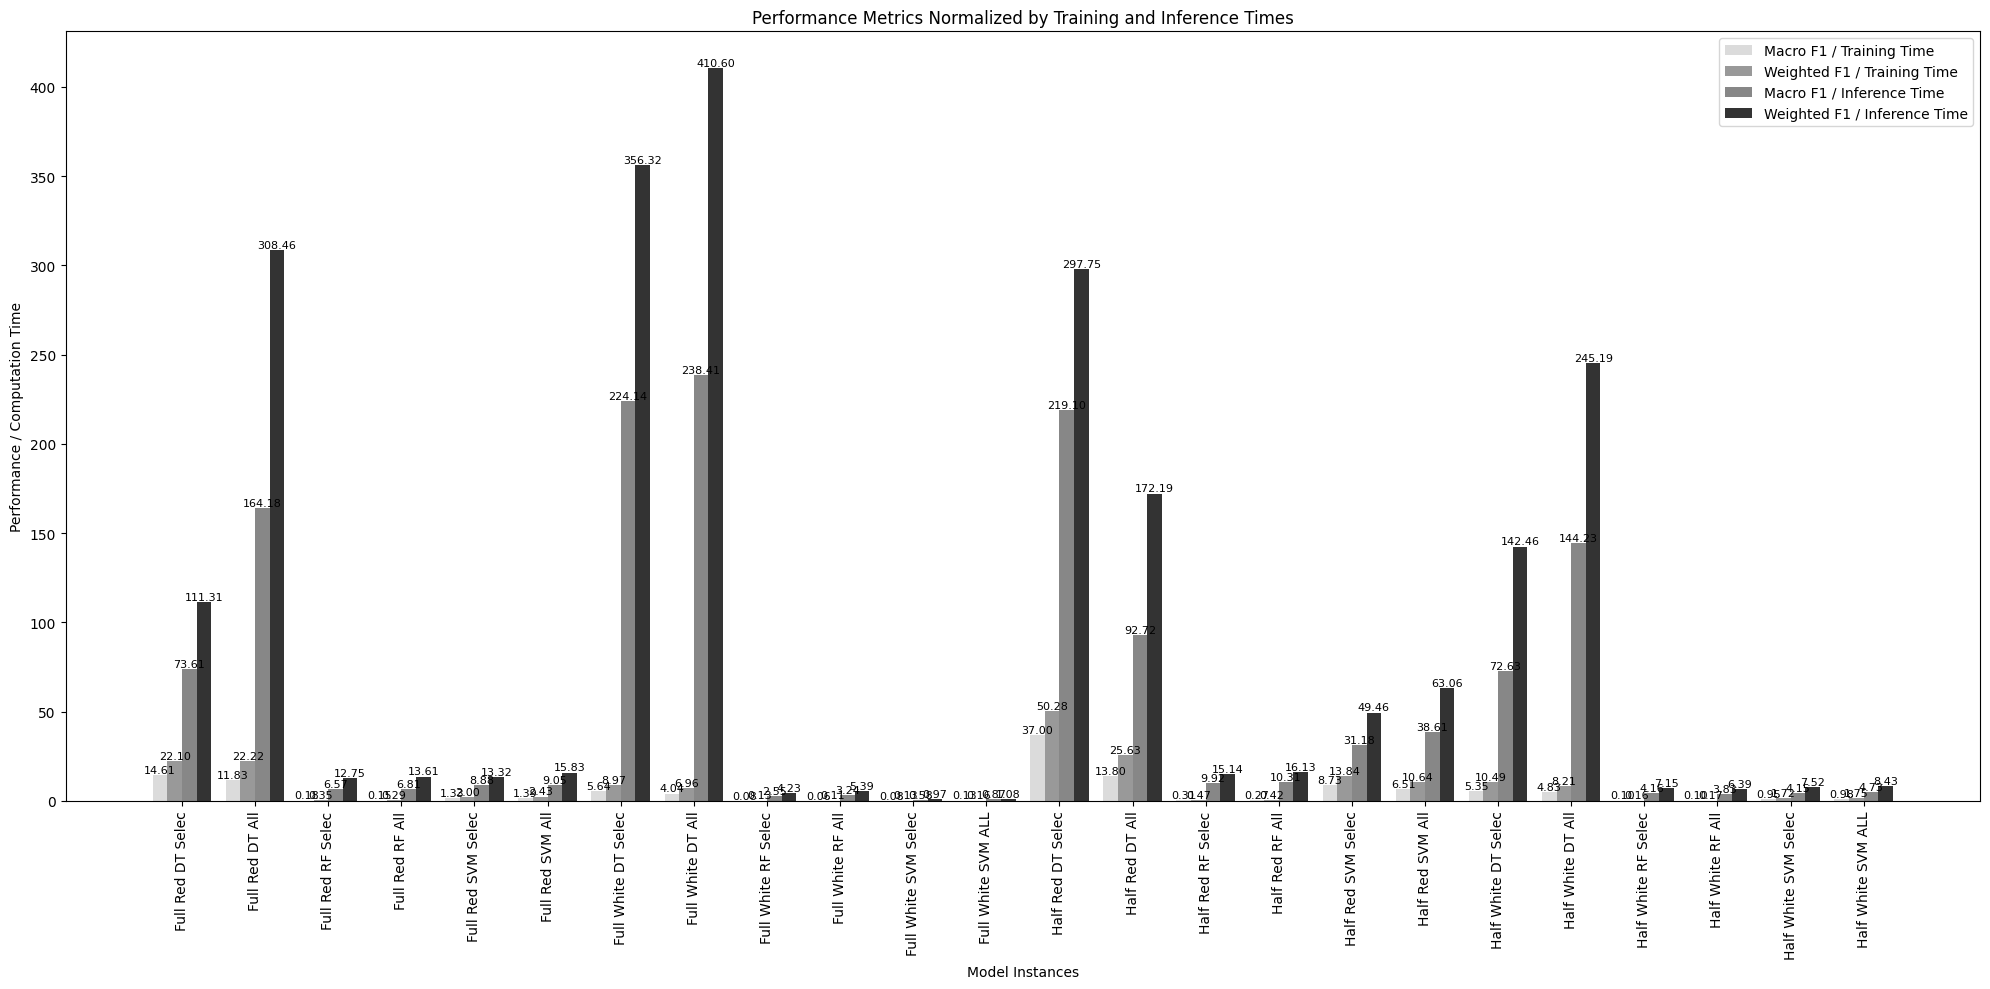

In [51]:
# Provided data
model_instances = [
    'Full Red DT Selec', 'Full Red DT All', 'Full Red RF Selec', 'Full Red RF All', 'Full Red SVM Selec', 'Full Red SVM All',
    'Full White DT Selec', 'Full White DT All', 'Full White RF Selec', 'Full White RF All', 'Full White SVM Selec', 'Full White SVM ALL',
    'Half Red DT Selec', 'Half Red DT All', 'Half Red RF Selec', 'Half Red RF All', 'Half Red SVM Selec', 'Half Red SVM All',
    'Half White DT Selec', 'Half White DT All', 'Half White RF Selec', 'Half White RF All', 'Half White SVM Selec', 'Half White SVM ALL'
]
f1_macro_specific = [0.41, 0.33, 0.34, 0.34, 0.32, 0.32, 0.39, 0.36, 0.41, 0.42, 0.24, 0.37, 0.39, 0.28, 0.38, 0.39, 0.29, 0.30, 0.26, 0.30, 0.32, 0.36, 0.21, 0.23]
f1_weighted_specific = [0.62, 0.62, 0.66, 0.68, 0.48, 0.56, 0.62, 0.62, 0.68, 0.70, 0.40, 0.46, 0.53, 0.52, 0.58, 0.61, 0.46, 0.49, 0.51, 0.51, 0.55, 0.60, 0.38, 0.41]

# Calculate performance per training time and inference time
macro_by_training = [f1 / train if train > 0 else 0 for f1, train in zip(f1_macro_specific, training_time_list)]
weighted_by_training = [f1 / train if train > 0 else 0 for f1, train in zip(f1_weighted_specific, training_time_list)]
macro_by_inference = [f1 / inf if inf > 0 else 0 for f1, inf in zip(f1_macro_specific, inference_time_list)]
weighted_by_inference = [f1 / inf if inf > 0 else 0 for f1, inf in zip(f1_weighted_specific, inference_time_list)]

# Plot the results
plt.figure(figsize=(20, 10))
x = range(len(model_instances))  # X-axis positions

# Macro F1 by Training Time
plt.bar(x, macro_by_training, width=0.2, label='Macro F1 / Training Time', align='center', color='lightgray', alpha=0.8)
# Weighted F1 by Training Time
plt.bar([p + 0.2 for p in x], weighted_by_training, width=0.2, label='Weighted F1 / Training Time', align='center', color='gray', alpha=0.8)
# Macro F1 by Inference Time
plt.bar([p + 0.4 for p in x], macro_by_inference, width=0.2, label='Macro F1 / Inference Time', align='center', color='dimgray', alpha=0.8)
# Weighted F1 by Inference Time
plt.bar([p + 0.6 for p in x], weighted_by_inference, width=0.2, label='Weighted F1 / Inference Time', align='center', color='black', alpha=0.8)

# Add labels and values on top of bars
for i, val in enumerate(macro_by_training):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8)
for i, val in enumerate(weighted_by_training):
    plt.text(i + 0.2, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8)
for i, val in enumerate(macro_by_inference):
    plt.text(i + 0.4, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8)
for i, val in enumerate(weighted_by_inference):
    plt.text(i + 0.6, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Adding labels, title, and legend
plt.xticks([p + 0.3 for p in x], model_instances, rotation=90, ha='center')  # Adjust x-ticks to align with bars
plt.xlabel('Model Instances')
plt.ylabel('Performance / Computation Time')
plt.title('Performance Metrics Normalized by Training and Inference Times')
plt.legend(loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()

